<a href="https://colab.research.google.com/github/jsebastianquiroga/Topicos_analitica/blob/main/Notebook/Social_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">




**Integrantes:**

**Joshep Andersson Blanco Reyes**

**Leonardo García Diaz**

**Juan Sebastián Quiroga Bernal**

# <img style="float: left; padding-right: 10px;" src="https://images7.alphacoders.com/671/671791.jpg"  height="300">




**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Big Data Derby 2022.</strong></h1> 

Los Derbies como se conocen, es un tipo de carreras de caballos, inventada alrededor de 1780 en Inglaterra, cuyos participantes son los jinetes y sus caballos, los cuales deben ser mayores a 3 años.



En esta ocasión se tomará como fuente de información una competencia de Kaggle , nombrada Big Data Derby 2022 (https://www.kaggle.com/competitions/big-data-derby-2022/overview), en donde se relacionan observaciones de 2000 carreras entre 2019-01 al 2020-01, de tres de sus principales circuitos AQU -Aqueduct, BEL - Belmont, SAR – Saratoga. 


El objetivo de este estudio es analizar las carreras de caballos, con el fin de desarrollar diferentes modelos, que permitan predecir si un caballo terminara entre los 3 primeros para intentar predecir las apuestas que aumentaran el retorno de inversión.



Su trabajo ayudará a los propietarios, entrenadores y veterinarios de caballos de carreras a comprender mejor cómo encajan el rendimiento y el bienestar de los equinos. Con un mejor análisis de datos. 

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Analisis exploratorio. </li>
<li> Modelo ingenuo: Sistema experto. </li>
<li> Modelo ingenuo: Sistema Rede Neuronal I. </li>
<li> Modelo ingenuo: Sistema Rede Neuronal II. </li>
<li> Conclusiones: Modelos ingenuos. </li>
<li> Algoritmo genético: Selección de variables. </li>
<li> Algoritmo genético: Selección de hiper-parametos con los features seleccionados. </li>
<li> Red Neuronal entrenada con algoritmo genéticos.</li>
<li> Modelo Fuzzy.</li>
<li> Modelo: Naive Bayes.</li>
<li> Modelo: KNNClassifier.</li>
<li> Modelo: XGBoost.</li>
<li> Modelo: CatBoost.</li>
<li> Modelo: AdaBoost.</li>
<li> Modelo: Voting.</li>
<li> Conclusiones.</li>
</ol>

***

# <h1><strong> 1. Analisis exploratorio. <h1><strong>

In [ ]:

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

nyra_2019_complete = '1AAshxhslPjhxg-UC86f9Z97s3W81nayF' #<-- Key del file en drive (nyra_2019_complete.csv 610 mb)
# nyra_race_table    = '1KtYQEvt4pboSqs7bO6jfdCHADo9PMzo9'#<-- Key del file en drive (nyra_race_table.csv 93 kb)
# nyra_start_table   = '1LYUx_De3U7TBw6GgqRk6whVzMjuJjSaz'#<-- Key del file en drive (nyra_start_table.csv 722 Kb)
# nyra_tracking_table= '15y4AtfLiyop9FWdc0SRaMUs-jKgnOppl'#<-- Key del file en drive (nyra_tracking_table.csv 320,7 mb)


download = drive.CreateFile({'id': nyra_2019_complete}) 
# Download the file to a local disc
download.GetContentFile('nyra_2019_complete.csv')
dtype_dict = {"track_id": object ,
              "race_date" :object, #will be read with "parse_dates" parameter
              "race_number" : np.int8, 
              "program_number" : object,
              "trakus_index" : np.int16,  
              "latitude" : np.float64,
              "longitude" : np.float64,
              "distance_id" : np.int16,  
              "course_type" : object, 
              "track_condition" : object,
              "run_up_distance" : np.int8,  
              "race_type" : object, 
              "purse" : np.int32,  
              "post_time" : np.int16,  
              "weight_carried" : np.int16,  
              "jockey" : object, 
              "odds" : np.int16,
              "position_at_finish":np.int8
             }
nyra_2019 = pd.read_csv('nyra_2019_complete.csv', header=None,dtype=dtype_dict,parse_dates=[1])
nyra_2019.columns= dtype_dict.keys()
nyra_2019_nn = nyra_2019.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


***Diccionario de Variables***

<li>track_id - Identificación de 3 caracteres para la pista en la que tuvo lugar la carrera. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga. 

<li> race_date - Fecha en la que tuvo lugar la carrera. YYYY-MM-DD. 

<li> race_number - Número de la carrera. 

<li> program_number - Es el identificador único del caballo en la carrera. 

<li> trakus_index - El seguimiento de un punto de la lat/long del caballo en la carrera pasado como un número entero. Por lo que podemos decir, se recopila cada 0,25 segundos. </li>

<li>latitude- La latitud del caballo en la carrera. 

<li>Longitude - La longitud del caballo en la carrera. 

<li>distance_id- Distancia de la carrera en estadios pasados como un número entero. 

<li>course_type- El recorrido de la carrera pasó como un carácter. M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf. 

<li>track_condition- El estado del recorrido en el que se corrió la carrera se transmite en tres caracteres. YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft. 

<li>run_up_distance- Distancia en pies desde la puerta hasta el inicio de la carrera. 

<li>race_type- char - La clasificación de la carrera pasó como cinco caracteres. STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight. 

<li>post_time - La hora del día en que comenzó la carrera 

<li>weight_carried - Un número entero del peso que lleva el caballo en la carrera 

<li>jockey - Nombre del jockey sobre el caballo en la carrera 

<li>odds - Probabilidades de ganar la carrera 

<li>position_at_finish- Un número entero de la posición final del caballo. 

Se asigno el formato indicado para cada una de las variables antes mencionadas.

In [ ]:
nyra_2019.info()
nyra_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   track_id            object        
 1   race_date           datetime64[ns]
 2   race_number         int64         
 3   program_number      object        
 4   trakus_index        int64         
 5   latitude            float64       
 6   longitude           float64       
 7   distance_id         int64         
 8   course_type         object        
 9   track_condition     object        
 10  run_up_distance     int64         
 11  race_type           object        
 12  purse               float64       
 13  post_time           int64         
 14  weight_carried      int64         
 15  jockey              object        
 16  odds                int64         
 17  position_at_finish  int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(6)
memory usage: 718.0+ MB


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


Se removerán las variables de trakus_index, latitude, longitude, ya que son información geolocalizada tomada durante la carrera, con el fin de predecir que caballo puede ganar antes de la carrera no tiene relación, ademas se creo una llave única para identificar cada carrera individualmente para un total de 2000 carreras.

In [ ]:
nyra_2019 = nyra_2019.drop(['latitude', 'longitude', 'trakus_index'], axis=1)
nyra_2019['unique_id'] = nyra_2019.track_id.astype(str) + '_' + nyra_2019.race_date.astype(str) + '_' + nyra_2019.race_number.astype(str)
print(nyra_2019.unique_id.value_counts())
nyra_2019

SAR_2019-07-25_1    9862
BEL_2019-09-19_1    9558
SAR_2019-08-22_1    8280
SAR_2019-07-24_1    7542
AQU_2019-11-03_8    7248
                    ... 
BEL_2019-06-26_6     984
BEL_2019-06-14_5     980
AQU_2019-03-02_3     882
BEL_2019-06-21_6     840
BEL_2019-06-28_4     774
Name: unique_id, Length: 2000, dtype: int64


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,unique_id
0,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
1,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
2,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
3,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
4,AQU,2019-01-01,9,6,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8,AQU_2019-01-01_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228426,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228427,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9
5228428,AQU,2019-11-23,9,2,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9,AQU_2019-11-23_9


In [ ]:
nyra_2019['unique_id'].nunique()

2000

Se eliminaran los valores repetidos, dejando solo una observación por caballo.

In [ ]:
nyra_2019 = nyra_2019.drop_duplicates()

In [ ]:
nyra_2019['track_id'].count()

15081

In [ ]:
nyra_2019['track_id'].value_counts(normalize=True) * 100

AQU    41.409721
BEL    37.219017
SAR    21.371262
Name: track_id, dtype: float64

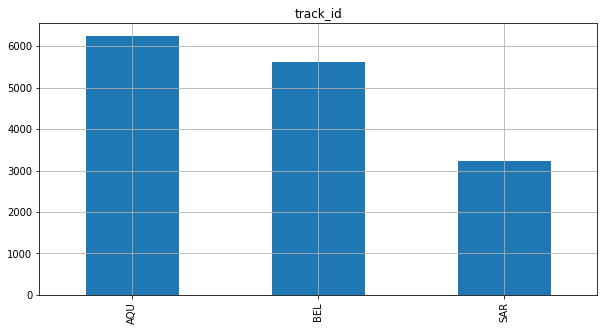

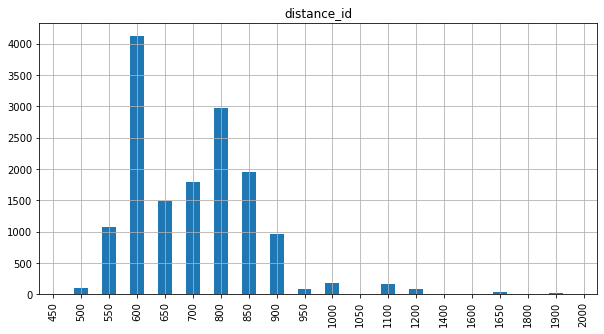

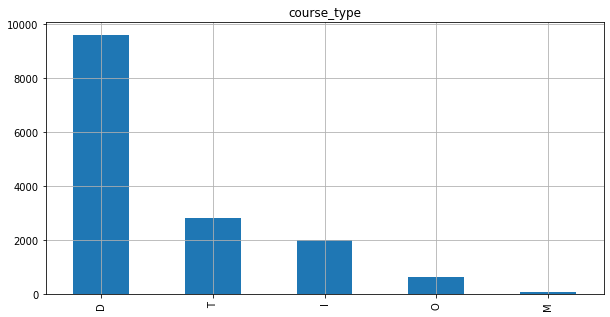

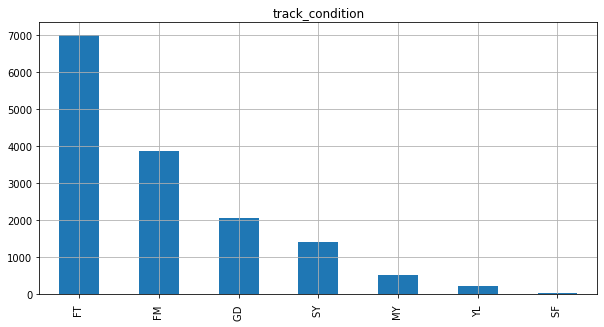

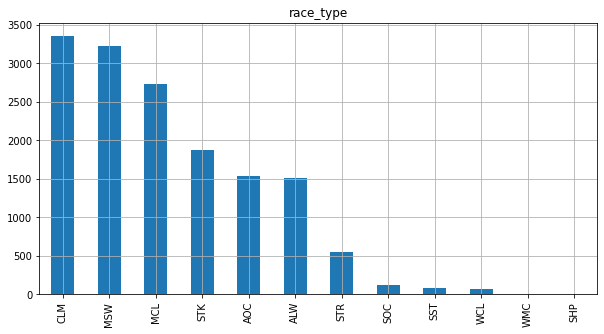

In [ ]:
categorical_features = ['track_id','distance_id','course_type','track_condition','race_type']
for f in categorical_features:
    plt.figure(figsize=(10,5))
    if (f=='distance_id'):
        nyra_2019[f].value_counts().sort_index().plot(kind='bar')
    else:
        nyra_2019[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

Según el grafico, se puede observar que la mayoria de las carreras se corrieron en el acueducto.

El valor mas frecuente en las distancias de carrera es 600 pies.

La mayoría de las carreras tienen recorridos en tierra, con un estado tipo rapido.



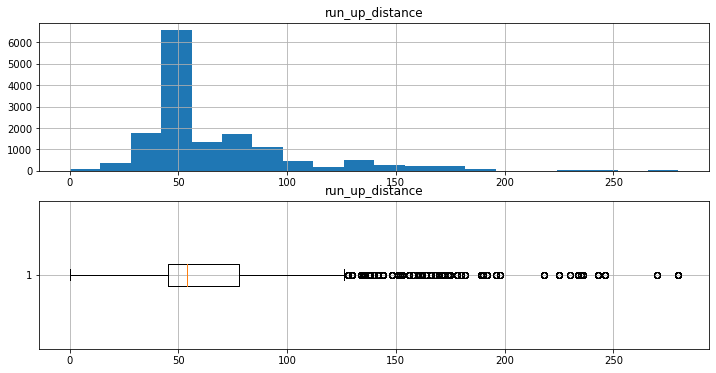

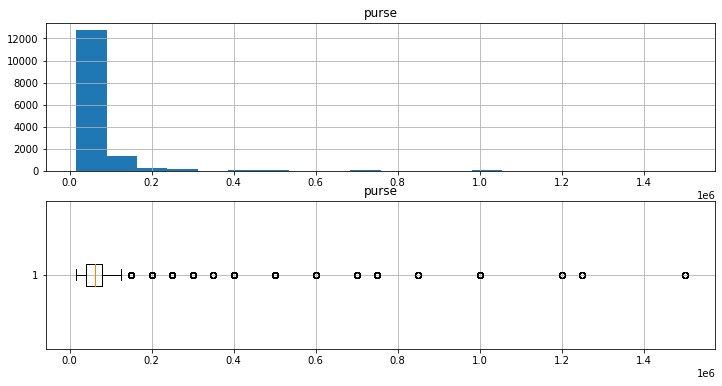

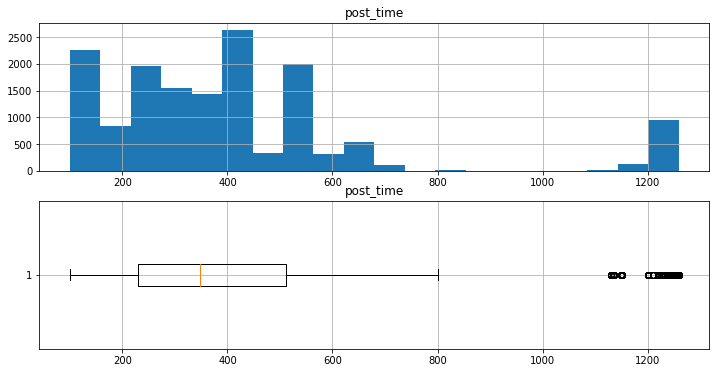

In [ ]:
numerical_features = ['run_up_distance','purse','post_time']
for f in numerical_features:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
    
    ax1.hist(nyra_2019[f], bins=20)
    ax1.grid()
    ax1.set_title(f)
    
    ax2.boxplot(nyra_2019[f], vert=False)
    ax2.grid()   
    ax2.set_title(f)
    
    plt.show()
    print('')

EL run up distance, que mide en pies la distancia desde la puerta hasta el inicio de la carrera, tiene una cola pesada hacia la derecha con algunos valores superiores a los 130 que podrian tomarse como valores poco frecuentes o atipicos.

La mayoria de las carreras son en las horas de la tarde, desde las 12:00 del medio dia hasta las 8:00 pm, siendo 4:00pm la hora mas frecuente, de estos eventos.

Text(0.5, 1.0, 'Pearson Correlation')

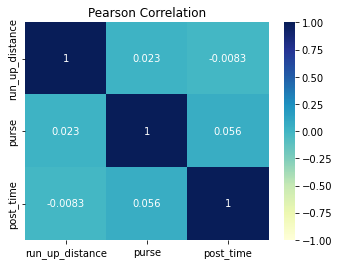

In [ ]:
corr_pearson = nyra_2019[numerical_features].corr(method='pearson')
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='YlGnBu', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

Se percibe una baja relación lineal entre las variables.

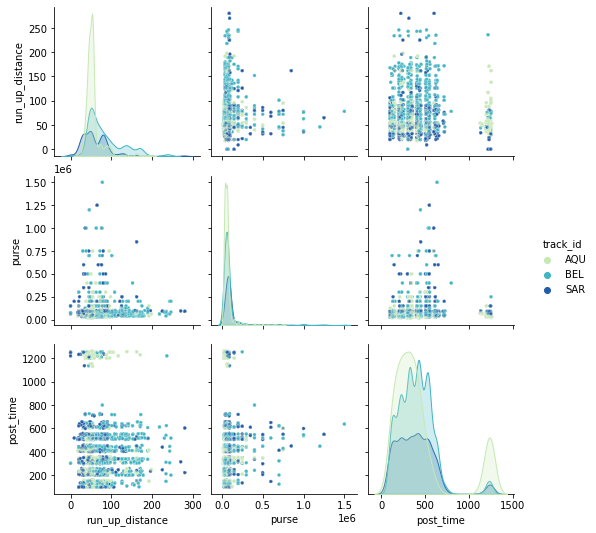

In [ ]:
sns.pairplot(nyra_2019, vars=numerical_features,
             hue='track_id',
             palette='YlGnBu',
             plot_kws= {'s' : 10, 'alpha' : 0.5})
plt.show()

No se observa ningun patrón claro, que genere diferenciación entre los 3 circuitos y el resto de las variables.

### ***Comparativo variables vs variable de respuesta (position_at_finish)***

In [ ]:
pd.crosstab(index=nyra_2019['track_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_id,,,,,,,,,,,,,,
AQU,41.127039,41.028176,41.345203,41.223272,41.23030,41.506130,41.245136,41.043084,42.439863,41.904762,47.500,47.191011,85.714286,50.0
BEL,38.704894,38.853188,38.328388,38.438588,38.58668,37.069469,34.941634,33.560091,30.584192,30.476190,31.875,33.707865,14.285714,50.0
SAR,20.168067,20.118636,20.326409,20.338140,20.18302,21.424402,23.813230,25.396825,26.975945,27.619048,20.625,19.101124,0.000000,0.0


In [ ]:
s =pd.crosstab(index=nyra_2019['track_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=1)
s

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_id,,,,,,,,,,,,,,
AQU,13.322658,13.290633,13.386709,13.274620,12.986389,11.385108,8.486789,5.796637,3.955164,2.113691,1.216974,0.672538,0.096077,0.016013
BEL,13.949759,14.003207,13.807233,13.771602,13.522181,11.313023,7.999287,5.273472,3.171210,1.710315,0.908605,0.534474,0.017816,0.017816
SAR,12.659013,12.627986,12.752094,12.690040,12.317716,11.386907,9.494260,6.950047,4.871238,2.699348,1.023891,0.527459,0.000000,0.000000


Se obtienen las distribuciones de los tacks ID, el 41% del total de los datos tienen relación con el track id AQU.

Se identifica que en la posisión 13 el 80% de las observaciones tienen relación con ese track ID.

Inicialmente en Saratoga, se identifiarón datos hasta las pocisiones 12, puede ser que en esta pista corran menos caballos en total.

Se observa un decrecimiento porcentual en la cantidad de observaciones, en las posiciones 13 y 14.

In [ ]:
x = pd.crosstab(index=nyra_2019['race_date'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)

x

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_date,,,,,,,,,,,,,,
2019-01-01,0.494315,0.444884,0.445104,0.447539,0.457550,0.467017,0.466926,0.226757,0.171821,0.000000,0.000,0.000000,0.000000,0.0
2019-01-04,0.395452,0.395452,0.395648,0.397812,0.406711,0.467017,0.233463,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
2019-01-05,0.494315,0.444884,0.445104,0.447539,0.508388,0.525394,0.466926,0.340136,0.171821,0.000000,0.000,0.000000,0.000000,0.0
2019-01-06,0.395452,0.395452,0.395648,0.397812,0.355872,0.291886,0.233463,0.340136,0.171821,0.000000,0.000,0.000000,0.000000,0.0
2019-01-10,0.247158,0.247158,0.247280,0.248633,0.254194,0.233508,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22,0.494315,0.494315,0.494560,0.497265,0.508388,0.583771,0.544747,0.453515,0.515464,0.634921,0.625,1.123596,14.285714,0.0
2019-12-28,0.444884,0.444884,0.445104,0.447539,0.457550,0.525394,0.544747,0.680272,0.687285,0.952381,1.875,3.370787,14.285714,0.0
2019-12-29,0.444884,0.444884,0.445104,0.447539,0.457550,0.408640,0.544747,0.566893,0.687285,0.952381,0.625,0.000000,0.000000,0.0


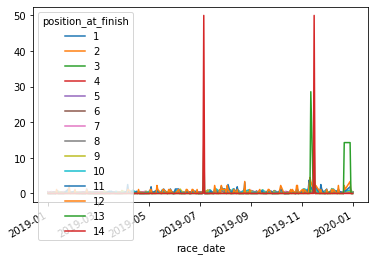

In [ ]:
x.plot()

Se evidencia un incremento en 3 fechas especificas de la existencia de los puntos 13 y 14. pareceria ser un comportamiento atipico.

In [ ]:
nyra_2019['race_number'].value_counts(normalize=True) * 100

6     11.305616
8     11.053644
5     10.947550
7     10.629269
4     10.297726
2     10.005968
3      9.528546
9      9.269942
1      9.163849
10     5.145547
11     1.863272
12     0.623301
13     0.165772
Name: race_number, dtype: float64

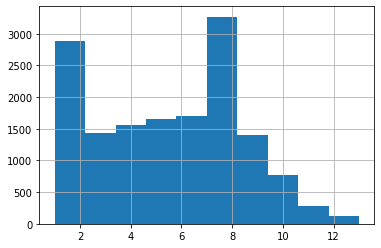

In [ ]:
nyra_2019['race_number'].hist()

In [ ]:
xp = pd.crosstab(index=nyra_2019['race_number'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
xp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_number,,,,,,,,,,,,,,
1,10.726644,10.973801,10.633037,10.790651,10.676157,8.698190,6.303502,4.421769,3.436426,2.539683,1.875,1.123596,0.000000,0.0
2,10.776075,10.776075,10.880317,10.790651,10.879512,9.924110,9.182879,7.256236,6.701031,6.349206,4.375,4.494382,0.000000,0.0
3,10.776075,10.776075,10.979228,10.641472,10.269446,9.165207,7.392996,6.349206,5.326460,4.761905,3.750,3.370787,0.000000,0.0
4,10.776075,10.776075,10.781405,10.740925,10.777834,10.566258,10.894942,9.863946,6.872852,5.079365,2.500,3.370787,0.000000,0.0
5,10.677212,10.578349,10.830861,10.691198,10.828673,11.208406,11.673152,12.244898,12.027491,9.523810,8.125,10.112360,14.285714,50.0
6,10.528917,10.677212,10.484669,10.641472,10.472801,11.675423,12.684825,13.832200,13.402062,13.650794,14.375,15.730337,14.285714,0.0
7,10.627781,10.825507,10.435213,10.641472,10.676157,11.091652,11.361868,10.430839,10.137457,9.841270,5.625,6.741573,14.285714,0.0
8,10.627781,10.479486,10.583581,10.740925,10.828673,11.383538,11.673152,12.244898,12.886598,11.428571,13.750,11.235955,14.285714,0.0
9,8.255067,7.958478,8.110781,8.055694,8.185053,9.281961,10.116732,11.791383,14.432990,16.507937,22.500,17.977528,14.285714,50.0


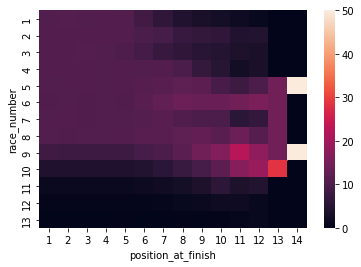

In [ ]:
sns.heatmap(xp)

Se observan que en las carreras 5 y 9 solo se presentarón posiciones 14, y referente a la 13 solo se presentan datos de la carera 5-10 (solo el 38% de las occurrencias)

In [ ]:
nyra_2019['program_number'].value_counts(normalize=True) * 100

3      7.346993
4      7.287315
2      7.221007
5      7.194483
1      7.141436
6      6.710430
7      5.682647
5      4.429414
8      4.416153
4      4.396260
6      4.382998
3      4.369737
1      4.303428
2      4.276905
7      3.613819
9      3.269014
8      2.731914
10     2.300908
9      1.816856
11     1.399111
10     1.299649
1A     1.087461
12     0.875274
11     0.848750
12     0.470791
13     0.324912
13     0.192295
14     0.159141
14     0.139248
15     0.086201
15     0.072939
2B     0.072939
16     0.039785
16     0.026523
3X     0.006631
1X     0.006631
Name: program_number, dtype: float64

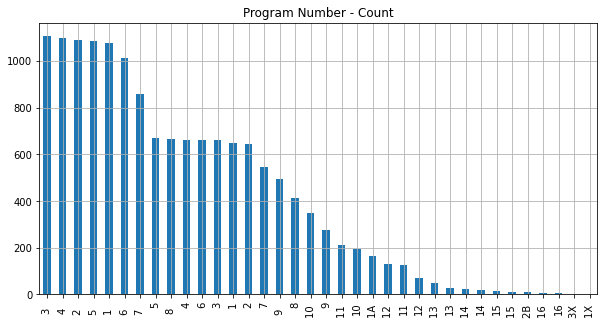

In [ ]:
plt.figure(figsize=(10,5))
nyra_2019.program_number.value_counts().plot(kind='bar')
plt.title('Program Number - Count')
plt.grid()
plt.show()

In [ ]:
xpp = pd.crosstab(index=nyra_2019['program_number'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
xpp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
program_number,,,,,,,,,,,,,,
1,4.597133,4.597133,4.500495,4.624565,4.677173,4.144775,4.669261,2.947846,2.577320,3.174603,1.250,3.370787,0.000000,0.0
2,4.695996,4.745428,4.005935,5.768274,4.168785,4.144775,3.346304,3.514739,2.577320,3.174603,1.875,2.247191,0.000000,0.0
3,5.091448,4.399407,4.797230,4.375932,4.422979,4.203152,4.124514,4.308390,3.264605,1.904762,3.125,2.247191,0.000000,0.0
4,4.794859,4.992585,4.005935,4.674291,4.982206,3.619381,4.513619,3.287982,3.608247,3.809524,3.750,4.494382,0.000000,0.0
5,5.190311,3.954523,5.093966,3.928394,4.778851,4.611792,5.058366,3.514739,2.920962,2.539683,3.125,2.247191,0.000000,0.0
6,3.855660,5.289174,4.549951,4.525112,4.880529,4.319907,3.735409,4.308390,3.780069,2.857143,3.125,1.123596,0.000000,0.0
7,3.608502,2.965892,3.560831,3.530582,4.117946,4.203152,3.190661,3.854875,3.264605,4.444444,3.750,1.123596,14.285714,0.0
8,2.570440,2.965892,2.423343,2.436599,2.440264,2.743724,3.346304,3.628118,3.608247,2.222222,2.500,0.000000,0.000000,0.0
9,1.285220,1.334652,1.434224,1.442069,1.372649,1.868068,1.789883,4.195011,3.951890,3.809524,5.000,1.123596,0.000000,0.0


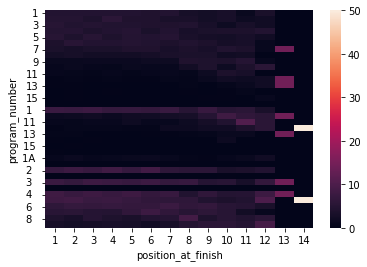

In [ ]:
sns.heatmap(xpp)

Se observa que el numero de programa 4, tiene el 8% de observaciones que terminaron en la primera poción, mayor que el resto de obervaciones.

In [ ]:
nyra_2019['distance_id'].value_counts(normalize=True) * 100

600     27.372190
800     19.693654
850     12.916915
700     11.849347
650      9.846827
550      7.108282
900      6.405411
1000     1.259863
1100     1.067568
500      0.676348
950      0.543731
1200     0.530469
1650     0.285127
1900     0.099463
450      0.079570
2000     0.066309
1600     0.053047
1800     0.053047
1400     0.046416
1050     0.046416
Name: distance_id, dtype: float64

In [ ]:
px = pd.crosstab(index=nyra_2019['distance_id'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
px

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
distance_id,,,,,,,,,,,,,,
450,0.098863,0.098863,0.098912,0.099453,0.101678,0.116754,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
500,0.889768,0.889768,0.890208,0.845351,0.711744,0.642148,0.389105,0.113379,0.000000,0.000000,0.000,0.000000,0.000000,0.0
550,6.574394,6.574394,6.528190,6.514172,6.659888,6.713368,7.859922,9.863946,10.137457,10.476190,7.500,5.617978,0.000000,0.0
600,27.236777,27.236777,27.101879,27.200398,27.249619,27.904262,27.548638,26.984127,27.663230,29.206349,26.875,29.213483,42.857143,0.0
650,9.787444,9.738013,9.792285,9.845848,9.913574,9.982487,9.649805,10.317460,9.278351,7.936508,10.000,15.730337,42.857143,50.0
700,12.011864,12.110727,12.215628,12.133267,11.997966,11.908932,12.451362,10.997732,10.481100,9.206349,8.750,7.865169,0.000000,0.0
800,20.069204,20.069204,20.079130,20.039781,20.030503,20.023351,18.754864,18.934240,18.384880,18.095238,18.125,12.359551,0.000000,0.0
850,12.605042,12.456747,12.561820,12.580806,12.608033,12.084063,13.229572,13.492063,14.261168,17.777778,19.375,22.471910,0.000000,0.0
900,6.920415,6.969847,6.923838,6.862258,6.914082,6.421483,5.680934,4.875283,5.498282,2.539683,3.125,0.000000,0.000000,0.0


In [ ]:
nyra_2019['course_type'].value_counts(normalize=True) * 100

D    63.463961
T    18.639348
I    13.274982
O     4.117764
M     0.503945
Name: course_type, dtype: float64

In [ ]:
pxp = pd.crosstab(index=nyra_2019['course_type'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
pxp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
course_type,,,,,,,,,,,,,,
D,67.523480,67.375185,67.556874,67.429140,66.802237,64.098074,57.898833,52.721088,47.766323,38.730159,38.750,35.955056,57.142857,50.0
I,12.456747,12.407316,12.413452,12.580806,12.709710,13.485114,14.785992,15.873016,15.807560,16.825397,15.000,14.606742,14.285714,50.0
M,0.444884,0.444884,0.445104,0.447539,0.457550,0.642148,0.700389,0.566893,0.515464,0.317460,0.625,1.123596,0.000000,0.0
O,3.311913,3.361345,3.412463,3.281949,3.355363,3.736135,4.902724,6.009070,7.560137,9.841270,10.000,13.483146,28.571429,0.0
T,16.262976,16.411270,16.172107,16.260567,16.675140,18.038529,21.712062,24.829932,28.350515,34.285714,35.625,34.831461,0.000000,0.0


In [ ]:
nyra_2019['track_condition'].value_counts(normalize=True) * 100

FT     46.349712
FM     25.621643
GD     13.619786
SY      9.389298
MY      3.368477
YL      1.525098
SF      0.125986
Name: track_condition, dtype: float64

In [ ]:
pxp = pd.crosstab(index=nyra_2019['track_condition'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
pxp

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
track_condition,,,,,,,,,,,,,,
FM,22.787939,22.787939,22.848665,22.824465,23.182511,24.985406,29.416342,33.560091,36.769759,40.317460,46.250,49.438202,42.857143,50.0
FT,48.739496,48.788927,48.961424,48.781701,48.754448,47.285464,42.412451,39.229025,36.082474,30.793651,29.375,30.337079,57.142857,50.0
GD,12.605042,12.703905,12.462908,12.729985,12.811388,13.660245,15.408560,15.646259,17.697595,21.904762,16.875,14.606742,0.000000,0.0
MY,3.657934,3.707365,3.659743,3.679761,3.609558,3.677758,3.035019,2.494331,2.061856,0.634921,1.250,0.000000,0.000000,0.0
SF,0.148295,0.148295,0.148368,0.149180,0.152517,0.116754,0.077821,0.113379,0.000000,0.000000,0.000,0.000000,0.000000,0.0
SY,10.528917,10.331191,10.385757,10.343113,9.964413,8.639813,7.937743,7.482993,6.185567,5.079365,5.000,4.494382,0.000000,0.0
YL,1.532378,1.532378,1.533136,1.491795,1.525165,1.634559,1.712062,1.473923,1.202749,1.269841,1.250,1.123596,0.000000,0.0


In [ ]:
nyra_2019['race_type'].value_counts(normalize=True) * 100

CLM    22.286321
MSW    21.397785
MCL    18.095617
STK    12.419601
AOC    10.204894
ALW    10.065646
STR     3.627080
SOC     0.769180
SST     0.517207
WCL     0.464160
WMC     0.079570
SHP     0.072939
Name: race_type, dtype: float64

In [ ]:
rt = pd.crosstab(index=nyra_2019['race_type'],
            columns=nyra_2019['position_at_finish']).apply(lambda r: r/r.sum() * 100,
                                                                axis=0)
rt

position_at_finish,1,2,3,4,5,6,7,8,9,10,11,12,13,14
race_type,,,,,,,,,,,,,,
ALW,9.639150,9.688581,9.545005,9.845848,9.710219,9.924110,10.661479,10.430839,12.027491,12.380952,13.125,16.853933,14.285714,0.0
AOC,11.468117,11.566980,11.325420,11.437096,11.082867,10.449504,8.171206,6.689342,5.326460,5.079365,3.125,1.123596,0.000000,0.0
CLM,23.529412,23.578843,23.590504,23.321730,22.979156,22.358435,22.101167,19.501134,17.353952,12.380952,11.875,11.235955,28.571429,0.0
MCL,16.213544,16.114681,16.221563,16.310293,16.675140,17.629889,19.688716,23.129252,24.742268,29.841270,36.250,37.078652,28.571429,50.0
MSW,20.415225,20.316362,20.524233,20.188961,20.589731,21.015762,22.957198,25.396825,26.804124,29.206349,20.625,19.101124,0.000000,0.0
SHP,0.098863,0.098863,0.098912,0.099453,0.101678,0.058377,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
SOC,0.889768,0.939199,0.890208,0.895077,0.965938,0.817280,0.700389,0.113379,0.000000,0.000000,0.000,0.000000,0.000000,0.0
SST,0.494315,0.494315,0.544016,0.546992,0.508388,0.525394,0.466926,0.566893,0.859107,0.317460,0.000,0.000000,0.000000,0.0
STK,12.852200,12.852200,12.957468,12.978618,13.014743,12.784588,11.439689,10.884354,9.450172,8.253968,12.500,10.112360,14.285714,50.0


Se eliminan las obervaciones de las posiciones 13 y 14

In [ ]:
nyra_2019 = nyra_2019[(nyra_2019['position_at_finish']!=13)&(nyra_2019['position_at_finish']!=14)]

In [ ]:
nyra_2019.jockey.value_counts()

Manuel Franco      1288
Dylan Davis        1117
Jose Lezcano        999
Junior Alvarado     862
Irad Ortiz Jr.      808
                   ... 
Cory Orm              1
Martin Chuan          1
Navin Mangalee        1
Dana G. Whitney       1
Tony Piccone          1
Name: jockey, Length: 177, dtype: int64

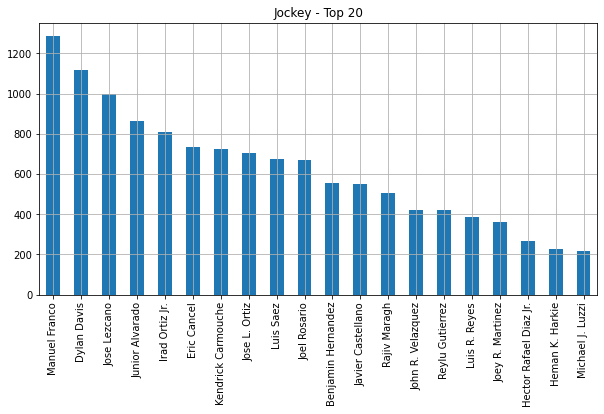

In [ ]:
plt.figure(figsize=(10,5))

nyra_2019.jockey.value_counts()[0:20].plot(kind='bar')

plt.title('Jockey - Top 20')

plt.grid()

plt.show()

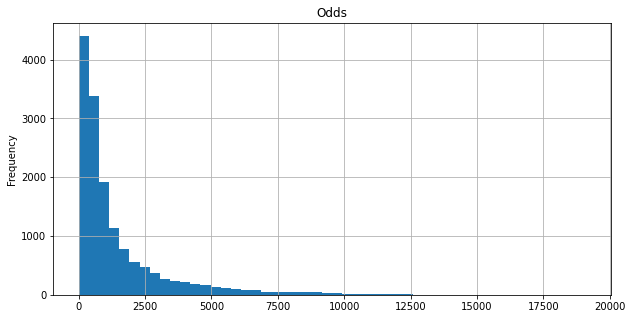

In [ ]:
plt.figure(figsize=(10,5))
nyra_2019.odds.plot(kind='hist', bins=50)
plt.title('Odds')
plt.grid()
plt.show()

Se crean 3 variables, con el fin de mejorar las predicciones, las cuales son:

<ol>
<li> Participantes : determinara cuantos caballos estan en competencia en dicha carrera. </li>
<li> Percentage_first_3: Probabilidad de estar entre los primeros 3 (constante por carrera). </li>
<li> Odds_ranking : Ranking de los odds por carrera. </li>
</ol>

In [ ]:
nyra_2019rne = nyra_2019.copy()

nyra_2019['trakus_index'] = nyra_2019_nn['trakus_index']
positions = pd.DataFrame(
    nyra_2019[(nyra_2019["trakus_index"] == 1)]
    .groupby(["race_number", "race_date"])["track_id"]
    .count()
).reset_index()
positions = positions.rename(columns={"track_id": "participantes"})
nyra_2019 = nyra_2019[nyra_2019["trakus_index"] == 1].sort_values(
    by=["race_date", "track_id", "race_number", "odds"],
    ascending=True,
    na_position="first",
)

nyra_2019 = nyra_2019.merge(
    positions, on=["race_number", "race_date"], how="left"
)

nyra_2019["First_3"] = "Unknown"
nyra_2019.loc[
    nyra_2019["position_at_finish"].between(0, 4, inclusive=False), "First_3"
] = 1
nyra_2019.loc[
    nyra_2019["position_at_finish"].between(4, 60, inclusive=True), "First_3"
] = 0

nyra_2019["Percentage_first_3"] = 3 / nyra_2019["participantes"]

nyra_2019["odds_ranking"] = nyra_2019.groupby(["race_number", "race_date"])[
    "odds"
].rank(method="first", ascending=False)
nyra_2019.sort_values(by=["race_date", "track_id", "race_number"])
nyra_2019 = nyra_2019.drop(['First_3', 'trakus_index'], axis=1)
nyra_2019

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,unique_id,participantes,Percentage_first_3,odds_ranking
0,AQU,2019-01-01,2,3,600,D,MY,48,MCL,41000.0,1250,121,Dylan Davis,165,4,AQU_2019-01-01_2,7,0.428571,7.0
1,AQU,2019-01-01,2,1,600,D,MY,48,MCL,41000.0,1250,121,Jose Lezcano,220,2,AQU_2019-01-01_2,7,0.428571,6.0
2,AQU,2019-01-01,2,6,600,D,MY,48,MCL,41000.0,1250,116,Reylu Gutierrez,340,1,AQU_2019-01-01_2,7,0.428571,5.0
3,AQU,2019-01-01,2,5,600,D,MY,48,MCL,41000.0,1250,121,Andre Shivnarine Worrie,800,3,AQU_2019-01-01_2,7,0.428571,4.0
4,AQU,2019-01-01,2,2,600,D,MY,48,MCL,41000.0,1250,114,Benjamin Hernandez,940,7,AQU_2019-01-01_2,7,0.428571,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,AQU,2019-12-31,8,2,600,D,SY,45,MCL,33000.0,405,112,Luis Cardenas,1850,6,AQU_2019-12-31_8,10,0.300000,5.0
10325,AQU,2019-12-31,8,10,600,D,SY,45,MCL,33000.0,405,117,Leonardo Corujo,4725,9,AQU_2019-12-31_8,10,0.300000,4.0
10326,AQU,2019-12-31,8,7,600,D,SY,45,MCL,33000.0,405,122,Gary Richards,6650,10,AQU_2019-12-31_8,10,0.300000,3.0
10327,AQU,2019-12-31,8,5,600,D,SY,45,MCL,33000.0,405,122,Dalton Brown,8100,3,AQU_2019-12-31_8,10,0.300000,2.0


# <h1><strong> 2. Modelo ingenuo: Sistema experto </h1></strong>

Entendiendo que las variables que trackean cada 15 segundos la posición en la carrera (latitud, longitud y track index), vamos inicialmente a tomar los valores únicos para que éstos sirvan para hacer una predicción sencilla, tanto de reglas, como de red neuronal.

In [ ]:
nyra_2019_naive = nyra_2019.copy()
nyra_2019_naive = nyra_2019_naive[[
    "track_id",
    "race_date",
    "race_number",
    "program_number",
    "distance_id",
    "course_type",
    "track_condition",
    "run_up_distance",
    "race_type",
    "purse",
    "weight_carried",
    "odds",
    "position_at_finish",
    "jockey"
]]
nyra_2019_naive.head()

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey
0,AQU,2019-01-01,2,3,600,D,MY,48,MCL,41000.0,121,165,4,Dylan Davis
1,AQU,2019-01-01,2,1,600,D,MY,48,MCL,41000.0,121,220,2,Jose Lezcano
2,AQU,2019-01-01,2,6,600,D,MY,48,MCL,41000.0,116,340,1,Reylu Gutierrez
3,AQU,2019-01-01,2,5,600,D,MY,48,MCL,41000.0,121,800,3,Andre Shivnarine Worrie
4,AQU,2019-01-01,2,2,600,D,MY,48,MCL,41000.0,114,940,7,Benjamin Hernandez


In [ ]:
nyra_2019_naive=nyra_2019_naive.drop_duplicates()

Teniendo los datos únicos por carrera podemos ejecutar un modelo naive y un modelo de red neuronal.

Para este caso vamos a intentar predecir si el caballo quedó entre los ***cinco primeros*** (Variable categórica) y así hacer una matriz de confusión con los aciertos.

In [ ]:
nyra_2019_naive['First_3'] = 'Unknown'
nyra_2019_naive.loc[nyra_2019_naive['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
nyra_2019_naive.loc[nyra_2019_naive['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


El modelo Naive más sencillo es ordenar los odds de menor a mayor, porque a mayor odds las casas de apuestas pagan más, esto quiere decir que si las casas de apuestas tienen un odds muy bajo, es porque probablemente el corredor va a ganar la carrera.

In [ ]:
nyra_2019_naive=nyra_2019_naive.sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
nyra_2019_naive.head()

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3
0,AQU,2019-01-01,2,3,600,D,MY,48,MCL,41000.0,121,165,4,Dylan Davis,0
1,AQU,2019-01-01,2,1,600,D,MY,48,MCL,41000.0,121,220,2,Jose Lezcano,1
2,AQU,2019-01-01,2,6,600,D,MY,48,MCL,41000.0,116,340,1,Reylu Gutierrez,1
3,AQU,2019-01-01,2,5,600,D,MY,48,MCL,41000.0,121,800,3,Andre Shivnarine Worrie,1
4,AQU,2019-01-01,2,2,600,D,MY,48,MCL,41000.0,114,940,7,Benjamin Hernandez,0


In [ ]:
nyra_2019_naive

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3
0,AQU,2019-01-01,2,3,600,D,MY,48,MCL,41000.0,121,165,4,Dylan Davis,0
1,AQU,2019-01-01,2,1,600,D,MY,48,MCL,41000.0,121,220,2,Jose Lezcano,1
2,AQU,2019-01-01,2,6,600,D,MY,48,MCL,41000.0,116,340,1,Reylu Gutierrez,1
3,AQU,2019-01-01,2,5,600,D,MY,48,MCL,41000.0,121,800,3,Andre Shivnarine Worrie,1
4,AQU,2019-01-01,2,2,600,D,MY,48,MCL,41000.0,114,940,7,Benjamin Hernandez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,AQU,2019-12-31,8,2,600,D,SY,45,MCL,33000.0,112,1850,6,Luis Cardenas,0
10325,AQU,2019-12-31,8,10,600,D,SY,45,MCL,33000.0,117,4725,9,Leonardo Corujo,0
10326,AQU,2019-12-31,8,7,600,D,SY,45,MCL,33000.0,122,6650,10,Gary Richards,0
10327,AQU,2019-12-31,8,5,600,D,SY,45,MCL,33000.0,122,8100,3,Dalton Brown,1


In [ ]:
##Carrera de ejemplo

nyra_2019_naive[(nyra_2019_naive['race_date']=='2019-01-01') & (nyra_2019_naive['race_number'] == 9)].sort_values(by='odds', ascending=True, na_position='first')


,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3


Tomando la carrera 9 del primero de enero del 2019, podemos observar que si ordenamos por odds, de las primeras 3 posiciones reales, el odd estuvo en una de ellas (acertó el ganador.)

Esta lógica es importante porque al separar el train y el test las predicciones no son independientes, y se debe hacer esta separación por carreras (80% carreras en train y 20% de carreras en test).

En éste caso vamos a predecir como los primeros 3 a los odds más bajos, como los que llegaron de primeras, esta sería nuestra predicción.

In [ ]:
first_ods=nyra_2019_naive.groupby(["race_date", "race_number"]).head(3).reset_index(
    drop=True
).sort_values(
    by=["race_date", "track_id", "race_number", "odds"],
    ascending=True,
    na_position="first",
)

first_ods['prediction'] = '1'
first_ods=first_ods[['race_date','race_number','program_number', 'prediction']]

Ahora vamos a integrar esta predicción naive a la base inicial.

In [ ]:
nyra_2019_naive=nyra_2019_naive.merge(first_ods, on=['race_date','race_number','program_number'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
nyra_2019_naive['prediction'] = nyra_2019_naive['prediction'].fillna(0)
nyra_2019_naive

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,weight_carried,odds,position_at_finish,jockey,First_3,prediction
0,AQU,2019-01-01,2,3,600,D,MY,48,MCL,41000.0,121,165,4,Dylan Davis,0,1
1,AQU,2019-01-01,2,1,600,D,MY,48,MCL,41000.0,121,220,2,Jose Lezcano,1,1
2,AQU,2019-01-01,2,6,600,D,MY,48,MCL,41000.0,116,340,1,Reylu Gutierrez,1,1
3,AQU,2019-01-01,2,5,600,D,MY,48,MCL,41000.0,121,800,3,Andre Shivnarine Worrie,1,0
4,AQU,2019-01-01,2,2,600,D,MY,48,MCL,41000.0,114,940,7,Benjamin Hernandez,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,AQU,2019-12-31,8,2,600,D,SY,45,MCL,33000.0,112,1850,6,Luis Cardenas,0,0
10325,AQU,2019-12-31,8,10,600,D,SY,45,MCL,33000.0,117,4725,9,Leonardo Corujo,0,0
10326,AQU,2019-12-31,8,7,600,D,SY,45,MCL,33000.0,122,6650,10,Gary Richards,0,0
10327,AQU,2019-12-31,8,5,600,D,SY,45,MCL,33000.0,122,8100,3,Dalton Brown,1,0


Métricas regla de asociación (Con todos los datos)

**Para facilitar la comparabilidad con los modelos de redes neuronales, también se añadió la métrica de asociación solamente para los datos de test**

El modelo acierta en un 69% de las veces si la posición estará dentro o fuera del top 3 de la carrera, el tener una precisión mayor al 50% se admite como modelo naive.

Recordar que la matriz de confusión de sklearn se muestra el revés, es decir la clase 1,1 (está en el top tres) es la de 2.692.
https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

nyra_2019_naive['First_3']=nyra_2019_naive['First_3'].astype(int)
nyra_2019_naive['prediction']=nyra_2019_naive['prediction'].astype(int)

In [ ]:
print('Precision:',precision_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']))
print('Recall:',recall_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']))
print('Accuracy:',accuracy_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']))
print('F1_Score:',f1_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']))

Precision: 0.6183753760703541
Recall: 0.6300400848856402
Accuracy: 0.6884499951592603
F1_Score: 0.6241532352254147


In [ ]:
d = {'Modelo': ['Sistema_experto'], 
     'Precision': [precision_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction'])], 
     'Recall': recall_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']),
     'Accuracy': accuracy_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction']),
     'F1_Score': f1_score(nyra_2019_naive['First_3'], nyra_2019_naive['prediction'])}
Resultados = pd.DataFrame(data=d)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.63004,0.68845,0.624153


# <h1><strong> 3. Modelo ingenuo: Sistema Rede Neuronal I.</h1></strong>



División Test Train

La división se va a hacer de manera secuencial, ordenada por fecha y tomaremos el 70% (1400 carreras como train y 600 carreras como test.)

Ordenamos las carreras por fecha y escogemos el 70% de las carreras para train y el 30% de las carreras para test

Para facilidad del algoritmo escogemos 4 variables continuas para predecir si en la carrera acabaron entre los 3 primeros.

Damos forma la los inputs de la red neuronal.

Para ésta red neuronal, se toman 4 inputs **('run_up_distance','purse'	,'weight_carried'	,'odds')**, 5 unidades en la primera capa con activación relu.

Luego, se añaden 4 neuronas con activación relu y 1 capa final con activación sigmoide.

Luego se compila con un optimizador Adam, una activación sigmoide y una función de pérdida binary_crossentropy.

La red se pasará por 5 épocas, con un batch size de 64.

In [ ]:
# positions = pd.DataFrame(
#     nyra_2019_nn[(nyra_2019_nn["trakus_index"] == 1)]
#     .groupby(["race_number", "race_date"])["track_id"]
#     .count()
# ).reset_index()
# positions = positions.rename(columns={"track_id": "participantes"})
# nyra_2019_naive = nyra_2019_nn[nyra_2019_nn["trakus_index"] == 1].sort_values(
#     by=["race_date", "track_id", "race_number", "odds"],
#     ascending=True,
#     na_position="first",
# )

# nyra_2019_naive = nyra_2019_naive.merge(
#     positions, on=["race_number", "race_date"], how="left"
# )



# nyra_2019_naive["Percentage_first_3"] = 3 / nyra_2019_naive["participantes"]

# nyra_2019_naive["odds_ranking"] = nyra_2019_naive.groupby(["race_number", "race_date"])[
#     "odds"
# ].rank(method="first", ascending=False)
# nyra_2019_naive.sort_values(by=["race_date", "track_id", "race_number"])

## No se añade la distancia, ni el purse porque son constantes para todas las carreras y añaden ruido a la muestra, por eso tendía a una línea recta de predicción
nyra_2019_naive = nyra_2019.copy()
nyra_2019_naive["First_3"] = "Unknown"
nyra_2019_naive.loc[
    nyra_2019_naive["position_at_finish"].between(0, 4, inclusive=False), "First_3"
] = 1
nyra_2019_naive.loc[
    nyra_2019_naive["position_at_finish"].between(4, 60, inclusive=True), "First_3"
] = 0

df_ann_1 = nyra_2019_naive.copy()
df_ann_1 = df_ann_1.drop("jockey", axis=1)
test = (
    df_ann_1[["race_date", "track_id", "race_number"]]
    .sort_values(by=["race_date", "track_id", "race_number"])
    .drop_duplicates()
    .head(600)
)
train = (
    df_ann_1[["race_date", "track_id", "race_number"]]
    .sort_values(by=["race_date", "track_id", "race_number"])
    .drop_duplicates()
    .tail(1400)
)
train_total = (
    train.merge(df_ann_1, on=["race_date", "race_number", "track_id"], how="left")
    .sort_values(
        by=["race_date", "track_id", "race_number", "odds_ranking"],
        ascending=True,
        na_position="first",
    )
    .reset_index()
)
test_total = (
    test.merge(df_ann_1, on=["race_date", "race_number", "track_id"], how="left")
    .sort_values(
        by=["race_date", "track_id", "race_number", "odds_ranking"],
        ascending=True,
        na_position="first",
    )
    .reset_index()
)


df_ann_1 = nyra_2019_naive.copy()
df_ann_1 = df_ann_1.drop("jockey", axis=1)
train = train_total.drop("race_date", axis=1)
test = test_total.drop("race_date", axis=1)
TargetVariable = ["First_3"]
Predictors = ["weight_carried", "odds_ranking", "Percentage_first_3"]
X_train = train[Predictors]
y_train = train[TargetVariable]
X_test = test[Predictors]
y_test = test[TargetVariable]
features_tra = []
features_tra = X_train.columns
features_te = []
features_te = X_test.columns
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(
    Dense(units=5, input_dim=3, kernel_initializer="uniform", activation="sigmoid")
)

# Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=4, kernel_initializer="uniform", activation="sigmoid"))
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer="adam", loss="binary_crossentropy")

# fitting the Neural Network on the training data
classifier.fit(X_train, y_train, batch_size=32, epochs=40, verbose=0)
classifier1 = classifier
dataframe = pd.DataFrame(classifier.predict(X_test).tolist())
dataframe = dataframe.rename(columns={0: "prediccion"})

carreras_test = test_total[
    [
        "race_date",
        "race_number",
        "position_at_finish",
        "First_3",
        "weight_carried",
        "odds",
        "track_id",
        "Percentage_first_3",
    ]
]
Base_prediccion = pd.concat([carreras_test, dataframe], axis=1).sort_values(
    by=["race_date", "track_id", "race_number", "odds", "position_at_finish"]
)
Base_prediccion["Prediccion_ranking"] = Base_prediccion.groupby(
    ["race_number", "race_date"]
)["prediccion"].rank(method="first", ascending=False)
Base_prediccion["First_3_ranking"] = np.where(
    Base_prediccion["Prediccion_ranking"].between(0, 5, inclusive=False),
    1,
    np.where(
        Base_prediccion["Prediccion_ranking"].between(4, 30, inclusive=False),
        0,
        "Unknown",
    ),
)

print(
    confusion_matrix(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    )
)
from sklearn import metrics

print(
    "Precision:",
    metrics.precision_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)
print(
    "Recall:",
    metrics.recall_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)
print(
    "Accuracy:",
    metrics.accuracy_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)
print(
    "F1_Score:",
    metrics.f1_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)



y_pred = Base_prediccion[["First_3_ranking"]].astype(int)
y_test =Base_prediccion[["First_3"]].astype(int)
d1 = {'Modelo': ['Red_Neuronal_1'], 
     'Precision': precision_score(y_test, y_pred.round()), 
     'Recall': recall_score(y_test, y_pred.round()),
     'Accuracy': accuracy_score(y_test, y_pred.round()),
      'F1_Score': f1_score(y_test, y_pred.round())}
Resultados1 = pd.DataFrame(data=d1)

Resultados = Resultados.append(Resultados1, ignore_index=True)
Resultados

126/126 [==============================] - 0s 2ms/step
[[1293  965]
 [ 342 1411]]
Precision: 0.5938552188552189
Recall: 0.804905875641757
Accuracy: 0.6741460982298678
F1_Score: 0.6834584645192541


,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.594276,0.805476,0.674645,0.683943
3,CatBoost,0.764073,0.689104,0.771129,0.724655
4,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
5,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
6,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
7,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
8,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
9,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458


# <h1><strong> 4. Modelo ingenuo: Sistema Rede Neuronal II .</h1></strong>

In [ ]:
nyra_2019_naive = nyra_2019.copy()
nyra_2019_naive["First_3"] = "Unknown"
nyra_2019_naive.loc[
    nyra_2019_naive["position_at_finish"].between(0, 4, inclusive=False), "First_3"
] = 1
nyra_2019_naive.loc[
    nyra_2019_naive["position_at_finish"].between(4, 60, inclusive=True), "First_3"
] = 0

nyra_2019_naive_cat = nyra_2019_naive[
    [
        "race_date",
        "track_id",
        "race_number",
        "weight_carried",
        "odds_ranking",
        "Percentage_first_3",
    ]
]
nyra_2019_naive_cat = pd.get_dummies(
    nyra_2019_naive,
    columns=["track_condition", "course_type", "race_type"],
    dtype="float",
)

test = (
    nyra_2019_naive_cat[["race_date", "track_id", "race_number"]]
    .sort_values(by=["race_date", "track_id", "race_number"])
    .drop_duplicates()
    .head(600)
)
train = (
    nyra_2019_naive_cat[["race_date", "track_id", "race_number"]]
    .sort_values(by=["race_date", "track_id", "race_number"])
    .drop_duplicates()
    .tail(1400)
)
train_total = (
    train.merge(
        nyra_2019_naive_cat, on=["race_date", "race_number", "track_id"], how="left"
    )
    .sort_values(
        by=["race_date", "track_id", "race_number", "odds_ranking"],
        ascending=True,
        na_position="first",
    )
    .reset_index()
)
test_total = (
    test.merge(
        nyra_2019_naive_cat, on=["race_date", "race_number", "track_id"], how="left"
    )
    .sort_values(
        by=["race_date", "track_id", "race_number", "odds_ranking"],
        ascending=True,
        na_position="first",
    )
    .reset_index()
)

###########################################################################################################
df_ann_1 = nyra_2019_naive.copy()
df_ann_1 = df_ann_1.drop("jockey", axis=1)
train = train_total.drop("race_date", axis=1)
test = test_total.drop("race_date", axis=1)
train = train_total.drop("race_date", axis=1)
TargetVariable = ["First_3"]
Predictors = [
    "weight_carried",
    "odds",
    "Percentage_first_3",
    "odds_ranking",
    "track_condition_FM ",
    "track_condition_FT ",
    "track_condition_GD ",
    "track_condition_MY ",
    "track_condition_SF ",
    "track_condition_SY ",
    "track_condition_YL ",
    "course_type_D",
    "course_type_I",
    "course_type_M",
    "course_type_O",
    "course_type_T",
    "race_type_ALW",
    "race_type_AOC",
    "race_type_CLM",
    "race_type_MCL",
    "race_type_MSW",
    "race_type_SHP",
    "race_type_SOC",
    "race_type_SST",
    "race_type_STK",
    "race_type_STR",
    "race_type_WCL",
    "race_type_WMC",
]
X_train = train[Predictors]
y_train = train[TargetVariable]
X_test = test[Predictors]
y_test = test[TargetVariable]
features_tra = []
features_tra = X_train.columns
features_te = []
features_te = X_test.columns
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)


import tensorflow.compat.v2 as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)
classifier2 = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier2.add(
    Dense(units=5, input_dim=28, kernel_initializer="uniform", activation="sigmoid")
)

# Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier2.add(Dense(units=4, kernel_initializer="uniform", activation="sigmoid"))
classifier2.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# fitting the Neural Network on the training data
classifier2.fit(
    X_train, y_train, batch_size=32, epochs=40, verbose=0, callbacks=[early_stopping]
)
dataframe = pd.DataFrame(classifier2.predict(X_test).tolist())
dataframe = dataframe.rename(columns={0: "prediccion"})

carreras_test = test_total[
    [
        "race_date",
        "race_number",
        "position_at_finish",
        "First_3",
        "weight_carried",
        "odds",
        "track_id",
        "Percentage_first_3",
    ]
]
Base_prediccion = pd.concat([carreras_test, dataframe], axis=1).sort_values(
    by=["race_date", "track_id", "race_number", "odds", "position_at_finish"]
)
Base_prediccion["Prediccion_ranking"] = Base_prediccion.groupby(
    ["race_number", "race_date"]
)["prediccion"].rank(method="first", ascending=False)
Base_prediccion["First_3_ranking"] = np.where(
    Base_prediccion["Prediccion_ranking"].between(0, 5, inclusive=False),
    1,
    np.where(
        Base_prediccion["Prediccion_ranking"].between(4, 30, inclusive=False),
        0,
        "Unknown",
    ),
)
print(
    confusion_matrix(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    )
)
from sklearn import metrics

print(
    "Precision:",
    metrics.precision_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)
print(
    "Recall:",
    metrics.recall_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)
print(
    "Accuracy:",
    metrics.accuracy_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)
print(
    "F1_Score:",
    metrics.f1_score(
        Base_prediccion[["First_3"]].astype(int),
        Base_prediccion[["First_3_ranking"]].astype(int),
    ),
)

y_pred2 = Base_prediccion[["First_3_ranking"]].astype(int)
y_test =Base_prediccion[["First_3"]].astype(int)

d2 = {'Modelo': ['Red_Neuronal_2'], 
     'Precision': precision_score(y_test, y_pred2), 
     'Recall': recall_score(y_test, y_pred2),
     'Accuracy': accuracy_score(y_test, y_pred2),
      'F1_Score': f1_score(y_test, y_pred2)}
Resultados2 = pd.DataFrame(data=d2)
Resultados = Resultados.append(Resultados2, ignore_index=True)


126/126 [==============================] - 0s 1ms/step
[[1292  966]
 [ 343 1410]]
Precision: 0.5934343434343434
Recall: 0.8043354249857387
Accuracy: 0.6736474694589878
F1_Score: 0.6829740857350449


# <h1><strong> 5. Conclusiones: Modelos ingenuos.</h1></strong>

In [ ]:
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490


En general los tres modelos tienen métricas similares.

La red neuronal 2 destaca por tener una presición alta (**buena capacidad para detectar a los 3 primeros de una carrera**) y tener un accuracy un poco mejor que los otros dos modelos llevados a cabo.

Sin embargo la red neuronal 1 tiene mayor sensibilidad, es decir, detecta casi el 74% correctamente los verdaderos  positivos, es decir los tres primeros en llegar a la meta, debido a que ésta es la métrica que más nos interesa, dado que la precisión es similar, el modelo que más nos ayuda a la predicción, es la red neuronal 2.

Aún estos modelos no consideran datos como la longitud y la latitud en la carrera, algo que en el futuro nos puede mejorar la predicción actual.

Se comprueba adicionalmente que el modelo de recomendación dado los odds (o el pago estimado de la casa de apuesta) tienen una naturaleza predictiva frente a quién ganará la carrera.

# <h1><strong> 6. Algoritmo genético: Selección de variables.</h1></strong>

In [ ]:
pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 8.3 MB/s 


In [ ]:
pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.7 MB/s 


In [ ]:
# from genetic_selection import GeneticSelectionCV
# estimator = RandomForestClassifier(max_depth=6, random_state=0)
# model = GeneticSelectionCV(
#     estimator, cv=5, verbose=0,
#     scoring="accuracy", n_population=15, crossover_proba=0.5,
#     mutation_proba=0.2, n_generations=50,
#     crossover_independent_proba=0.5,
#     mutation_independent_proba=0.04,
#     tournament_size=3, n_gen_no_change=10,
#     caching=True, n_jobs=-1)
# model = model.fit(X_train, y_train)
# print('Features:', X_train.columns[model.support_])

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
data = nyra_2019rne.copy()
data = data.drop('jockey', axis=1)
test=data[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=data[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
data['First_3'] = 0
data.loc[data['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
data = data.drop(['unique_id', 'position_at_finish'], axis=1)
data =  pd.get_dummies(data, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_F = data.copy()
train=train.merge(data_F, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_F, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  import sys


In [ ]:
s = X_test.columns
X_train = X_train[s]

In [ ]:
clf = RandomForestClassifier()
evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="accuracy",
    population_size=15,
    generations=10,
    n_jobs=-1)
# Entrena y selecciona las variables 
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	15    	0.56375	0.0509694  	0.669384   	0.5267     
1  	30    	0.578865	0.0530613  	0.672007   	0.529043   
2  	30    	0.628168	0.0547874  	0.672007   	0.548248   
3  	30    	0.647692	0.042803   	0.674068   	0.558366   
4  	30    	0.671089	0.00203399 	0.675567   	0.668447   
5  	30    	0.671239	0.00207416 	0.676316   	0.667604   
6  	30    	0.672887	0.00308486 	0.678846   	0.667697   
7  	30    	0.677559	0.00268873 	0.681844   	0.673037   
8  	30    	0.679189	0.00185856 	0.683249   	0.675848   
9  	30    	0.682337	0.00177738 	0.68531    	0.679502   
10 	30    	0.682531	0.00207457 	0.68531    	0.679595   
11 	30    	0.681544	0.00269237 	0.685404   	0.677628   
12 	30    	0.682724	0.00259467 	0.685404   	0.678003   
13 	30    	0.683286	0.00227916 	0.685404   	0.678658   
14 	30    	0.683755	0.00157131 	0.685404   	0.681001   
15 	30    	0.684523	0.0011615  	0.685404   	0.681001   


GAFeatureSelectionCV(estimator=RandomForestClassifier(), generations=15,
                     n_jobs=-1, population_size=15, return_train_score=True,
                     scoring='accuracy')

In [ ]:
features = evolved_estimator.best_features_
# print(features)
#X_test.columns[features]
variables_imp = X_test[X_test.columns[features]]
variables_imp

,race_number,distance_id,purse,weight_carried,odds,track_condition_GD,track_condition_SF,track_condition_SY,course_type_D,course_type_I,...,program_number_14,program_number_16,program_number_1A,program_number_3,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9
2520,1,650,80000.0,123,130,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2522,1,650,80000.0,118,180,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2521,1,650,80000.0,120,295,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2519,1,650,80000.0,118,1150,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2523,1,650,80000.0,123,1280,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,4,650,46000.0,117,320,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,4,650,46000.0,120,540,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1436,4,650,46000.0,122,750,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,4,650,46000.0,119,1430,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Predict only with the subset of selected features
X_trainn = X_train.to_numpy()
X_testt = X_test.to_numpy()
y_predict_ga = evolved_estimator.predict(X_testt[:, features])
#accuracy = accuracy_score(y_test, y_predict_ga)


In [ ]:
print('Precision:',precision_score(y_test, y_predict_ga))
print('Recall:',recall_score(y_test,y_predict_ga))
print('Accuracy:',accuracy_score(y_test,y_predict_ga))
print('F1_Score:',f1_score(y_test,y_predict_ga))

Precision: 0.6119133574007221
Recall: 0.5587912087912088
Accuracy: 0.6707594361073215
F1_Score: 0.5841470419299253


In [ ]:
d3 = {'Modelo': ['Algoritmo_Genético_Feature_Selection'], 
     'Precision': precision_score(y_test, y_predict_ga), 
     'Recall': recall_score(y_test, y_predict_ga),
     'Accuracy': accuracy_score(y_test, y_predict_ga),
      'F1_Score': f1_score(y_test, y_predict_ga)}
Resultados3 = pd.DataFrame(data=d3)

Resultados = Resultados.append(Resultados3, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147


# <h1><strong> 7.Algoritmo genético: Selección de hiper-parametos con los features seleccionados.</strong></h1>

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=15,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_trainn[:,features],y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.634907	0.0399291  	0.698988   	0.602024   
1  	18    	0.649147	0.0309256  	0.69852    	0.602024   
2  	17    	0.681516	0.0138415  	0.699831   	0.656923   
3  	20    	0.690182	0.00648599 	0.698895   	0.680907   
4  	19    	0.693657	0.00660234 	0.699176   	0.680626   
5  	19    	0.700562	0.00263814 	0.704235   	0.695897   
6  	18    	0.702492	0.00127302 	0.704235   	0.700019   
7  	20    	0.702202	0.00128185 	0.704235   	0.700487   
8  	19    	0.702267	0.00153656 	0.704235   	0.700019   
9  	17    	0.702258	0.00179889 	0.704235   	0.699082   
10 	17    	0.701939	0.0018635  	0.704235   	0.699082   
11 	17    	0.702726	0.00150741 	0.704235   	0.699831   
12 	17    	0.703213	0.0015351  	0.704235   	0.700019   
13 	20    	0.702651	0.00158184 	0.704235   	0.699831   
14 	18    	0.703167	0.00138147 	0.704235   	0.700862   
15 	19    	0.70312 	0.00186312 	0.704235   	0.698895   
16 	16    	0.70253 	0.00212681 	0.704235   	0.69

GASearchCV(crossover_probability=0.8,
           cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(bootstrap=False, max_depth=27,
                                            max_leaf_nodes=34,
                                            min_weight_fraction_leaf=0.011550706463397143,
                                            n_estimators=122),
           generations=20, keep_top_k=4, mutation_probability=0.1, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.spa...
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x7f0f78379250>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f0f783791d0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f0f783797d0>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f0f78379690>},
           population_size=10

In [ ]:
evolved_estimator.best_params_

{'min_weight_fraction_leaf': 0.011550706463397143,
 'bootstrap': False,
 'max_depth': 27,
 'max_leaf_nodes': 34,
 'n_estimators': 122}

In [ ]:
y_predicy_ga2 = evolved_estimator.predict(X_testt[:,features])
#accuracy_score(y_test,y_predicy_ga)

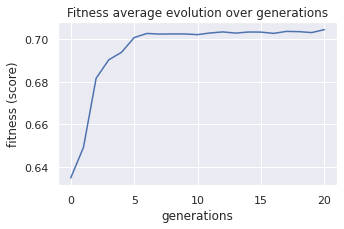

In [ ]:
plt.figure(figsize=(5,3))
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
print("Parámetros y sus cv_scores in cada iteración:")
print(evolved_estimator.logbook)

Parámetros y sus cv_scores in cada iteración:
                                                                                                                                                        parameters                                                                                                                                                        
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
bootstrap	cv_scores                         	fit_time                          	index	max_depth	max_leaf_nodes	min_weight_fraction_leaf	n_estimators	score   	score_time                        	test_score                        	train_score                       
False    	[0.68774592 0.67003935 0.66413716]	[0.67047071 0.69

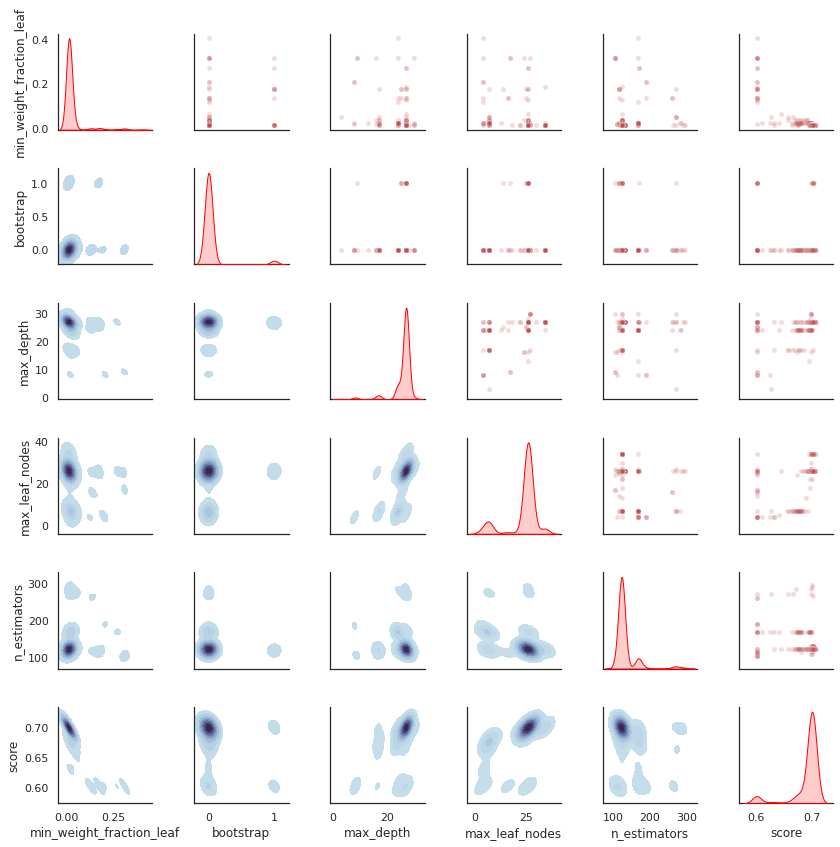

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plot_search_space(evolved_estimator)
plt.show()

In [ ]:
print("Mejores k soluciones:")
print(evolved_estimator.hof)

Mejores k soluciones:
{0: {'min_weight_fraction_leaf': 0.011550706463397143, 'bootstrap': False, 'max_depth': 27, 'max_leaf_nodes': 34, 'n_estimators': 122}, 1: {'min_weight_fraction_leaf': 0.011550706463397143, 'bootstrap': False, 'max_depth': 27, 'max_leaf_nodes': 26, 'n_estimators': 122}, 2: {'min_weight_fraction_leaf': 0.011550706463397143, 'bootstrap': False, 'max_depth': 27, 'max_leaf_nodes': 34, 'n_estimators': 122}, 3: {'min_weight_fraction_leaf': 0.011550706463397143, 'bootstrap': False, 'max_depth': 27, 'max_leaf_nodes': 26, 'n_estimators': 131}}


In [ ]:
print('Precision:',precision_score(y_test, y_predicy_ga2))
print('Recall:',recall_score(y_test,y_predicy_ga2))
print('Accuracy:',accuracy_score(y_test,y_predicy_ga2))
print('F1_Score:',f1_score(y_test,y_predicy_ga2))

Precision: 0.6179710144927536
Recall: 0.5857142857142857
Accuracy: 0.6787175989085948
F1_Score: 0.601410437235543


In [ ]:
d4 = {'Modelo': ['Algoritmo_Genético_Hyperparameter_Tuning '], 
     'Precision': precision_score(y_test, y_predicy_ga2), 
     'Recall': recall_score(y_test, y_predicy_ga2),
     'Accuracy': accuracy_score(y_test, y_predicy_ga2),
      'F1_Score': f1_score(y_test, y_predicy_ga2)}
Resultados4 = pd.DataFrame(data=d4)

Resultados = Resultados.append(Resultados4, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410


# <h1><strong>8.Red Neuronal entrenada con algoritmo genéticos.</strong></h1>


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = nyra_2019.copy()
data = data.drop('jockey', axis=1)
test=data[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=data[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
data['First_3'] = 0
data.loc[data['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
data = data.drop(['unique_id', 'position_at_finish'], axis=1)
data =  pd.get_dummies(data, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_F = data.copy()
train=train.merge(data_F, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_F, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']
X_train = X_train.drop('track_id_SAR', axis=1)
X_train = X_train#[X_train.columns[features]]
X_test = X_test#[X_test.columns[features]]
nl = X_train.shape[1]

In [ ]:
# Se define la clase de la red genetica.
class GeneticNeuralNetwork(Sequential):
    def __init__(self, child_weights=None): #Si los pesos no son informados se generan 'random'
        super().__init__()
        if child_weights is None:
            # Los 'Layers' se crean 'random', definiendo funcion de activación sigmoide.
            # se agregan los 'Layers' al modelo.
            layer1 = Dense(nl, input_shape=(nl,), activation='sigmoid')
            layer2 = Dense(2, activation='sigmoid')
            layer3 = Dense(1, activation='sigmoid')
            self.add(layer1)
            self.add(layer2)
            self.add(layer3)
        # Si los pesos son informados, se establecen al modelo.
        else:
            self.add(
                Dense(
                    nl,
                    input_shape=(nl,),
                    activation='sigmoid',
                    weights=[child_weights[0], np.zeros(nl)])
                )
            self.add(
                Dense(
                 2,
                 activation='sigmoid',
                 weights=[child_weights[1], np.zeros(2)])
            )
            self.add(
                Dense(
                 1,
                 activation='sigmoid',
                 weights=[child_weights[2], np.zeros(1)])
            )

    # Función de forward propagation
    def forward_propagation(self, X_train, y_train):
        y_hat = self.predict(X_train.values)
        # Se define el precision como funcion de fitness.
        self.fitness = precision_score(y_train, y_hat.round())
    # Backpropagation
    def compile_train(self, epochs):
        self.compile(
                      optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
                      )
        self.fit(X_train.values, y_train.values, epochs=epochs)

# Mutación.
def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut >= .5:
        child_weights[selection] *= random.randint(2, 5)
    else:
        # No mutation
        pass
# Cruses entre dos redes geneticas.
def dynamic_crossover(nn1, nn2):
    nn1_weights = []
    nn2_weights = []
    child_weights = []
    #obtener pesos.
    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])
    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    # Se obtienen todos los pesos de la capas para crossover.
    for i in range(0, len(nn1_weights)):
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        # Se añaden los pesos a los hijos.
        child_weights.append(nn1_weights[i])

    mutation(child_weights)

    child = GeneticNeuralNetwork(child_weights)
    return child

In [ ]:
# Crear lista para al redes, generaciones y se define 20 como population.
networks = []
pool = []
generation = 0
n = 20
# Se inicializan los pesos aleatoriamente.
for i in range(0, n):
    networks.append(GeneticNeuralNetwork())
max_fitness = 0
optimal_weights = []
# Loop evolutivo
while max_fitness < .58:
    # Registro de la generación.
    generation += 1
    print('Generation: ', generation)
    # Forward propagation, con base en el accuracy.(function fitness)
    for nn in networks:
        nn.forward_propagation(X_train, y_train)
        # Se agrega al pool.
        pool.append(nn)
    # Se limpia para los proximos hijos
    networks.clear()
    # Organiza basado en el fitness.
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()
    # Encuentra el maximo fitness y el registro con pesos asociados.
    for i in range(0, len(pool)):
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness
            print('Max Fitness: ', max_fitness)
            # Reset optimal_weights
            optimal_weights = []
            # Encuentra el maximo fitness y el registro con pesos asociados.
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            print(optimal_weights)

    # Crossover, Seleccion del top 5 aleatoriamente selecciona 2 patrones para el hijo.
    for i in range(0, 5):
        for j in range(0, 2):
            # Se crea un hijo y se agrega a las redes
            temp = dynamic_crossover(pool[i], random.choice(pool))
            # Se agrega la red para validar fitness
            networks.append(temp)
# Se crea una red con los pesos optimos obtenidos.
gnn = GeneticNeuralNetwork(optimal_weights)
gnn.compile_train(10)

Generation:  1
313/313 [==============================] - 0s 1ms/step
Max Fitness:  0.665158371040724
[array([[ 0.07411894,  0.13495871,  0.19668654, ..., -0.13658576,
        -0.1934363 , -0.0284808 ],
       [-0.14155826,  0.04458013, -0.05587944, ...,  0.10760543,
        -0.15835012,  0.11935842],
       [-0.0703952 ,  0.19085607,  0.1499396 , ...,  0.11326429,
         0.18160203,  0.14251009],
       ...,
       [ 0.07970899, -0.08247454, -0.12131304, ...,  0.13942474,
         0.19158578,  0.1972448 ],
       [ 0.16931897, -0.16810042, -0.11520075, ..., -0.17779511,
        -0.20157406, -0.18167636],
       [ 0.16288799,  0.05077496,  0.01599626, ..., -0.04678601,
        -0.02609539, -0.13622084]], dtype=float32), array([[ 0.23388252,  0.14109418],
       [ 0.28396013,  0.00648734],
       [-0.28249872, -0.22652586],
       [ 0.08454823, -0.12706369],
       [-0.18172057, -0.17500287],
       [ 0.2686679 , -0.14666164],
       [ 0.10221195,  0.2801846 ],
       [-0.27877152, -0

In [ ]:
# Test the Genetic Neural Network Out of Sample
y_hat = gnn.predict(X_test.values)
#print('Test Accuracy: %.2f' % accuracy_score(y_test, y_hat.round()))

126/126 [==============================] - 0s 2ms/step


In [ ]:
print('Precision:',precision_score(y_test, y_hat.round()))
print('Recall:',recall_score(y_test,y_hat.round()))
print('Accuracy:',accuracy_score(y_test,y_hat.round()))
print('F1_Score:',f1_score(y_test,y_hat.round()))

Precision: 0.9375
Recall: 0.008556759840273816
Accuracy: 0.5664422837197707
F1_Score: 0.016958733747880157


In [ ]:
d5 = {'Modelo': ['Red_Neuronal_Algoritmo_Genético'], 
     'Precision': precision_score(y_test, y_hat.round()), 
     'Recall': recall_score(y_test, y_hat.round()),
     'Accuracy': accuracy_score(y_test, y_hat.round()),
      'F1_Score': f1_score(y_test, y_hat.round())}
Resultados5 = pd.DataFrame(data=d5)

Resultados = Resultados.append(Resultados5, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959


# <h1><strong>9.Modelo Fuzzy.</strong></h1>

In [ ]:
df_fuzzy = nyra_2019.copy()
df_fuzzy['First_3'] = 0
df_fuzzy.loc[df_fuzzy['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
df_fuzzy.corr()

,race_number,distance_id,run_up_distance,purse,post_time,weight_carried,odds,position_at_finish,participantes,Percentage_first_3,odds_ranking,First_3
race_number,1.000000,0.039082,0.066138,0.269334,0.083264,-0.053015,0.087061,0.156367,0.380836,-0.281275,0.155554,-0.080758
distance_id,0.039082,1.000000,0.174963,0.265827,0.146840,0.328593,-0.012470,-0.002497,-0.009505,0.015857,-0.003883,0.001469
run_up_distance,0.066138,0.174963,1.000000,0.033966,-0.016611,-0.051270,0.010060,0.043747,0.114125,-0.097490,0.046615,-0.024886
purse,0.269334,0.265827,0.033966,1.000000,0.051065,0.027694,0.005296,0.012959,0.032168,-0.021743,0.013139,-0.005194
post_time,0.083264,0.146840,-0.016611,0.051065,1.000000,0.117407,0.025744,0.033954,0.095093,-0.069148,0.038841,-0.014926
weight_carried,-0.053015,0.328593,-0.051270,0.027694,0.117407,1.000000,-0.141259,-0.088050,-0.058040,0.048294,0.086726,0.073869
odds,0.087061,-0.012470,0.010060,0.005296,0.025744,-0.141259,1.000000,0.476751,0.273468,-0.191340,-0.533374,-0.335266
position_at_finish,0.156367,-0.002497,0.043747,0.012959,0.033954,-0.088050,0.476751,1.000000,0.383928,-0.276976,-0.229940,-0.797174
participantes,0.380836,-0.009505,0.114125,0.032168,0.095093,-0.058040,0.273468,0.383928,1.000000,-0.826864,0.408455,-0.205214
Percentage_first_3,-0.281275,0.015857,-0.097490,-0.021743,-0.069148,0.048294,-0.191340,-0.276976,-0.826864,1.000000,-0.337737,0.163316


Se identiica una correlación negativa referente al weight_carried con la posición final de la carrera, positiva con los odds, run_up_distance, por lo que si el peso disminuye podemos intuir que la posición de carrera incremente, mientras que la distancia y los odds aumentan, aumentan su posición en la carrera.

In [ ]:
print('Rango de Posiciones: ',df_fuzzy['position_at_finish'].min(),'-', df_fuzzy['position_at_finish'].max())
print('Rango de Peso cargado: ',df_fuzzy['weight_carried'].min(),'-', df_fuzzy['weight_carried'].max())
print('Rango de Distancia: ',df_fuzzy['run_up_distance'].min(),'-', df_fuzzy['run_up_distance'].max())
print('Rango de Odds: ',df_fuzzy['odds'].min(),'-', df_fuzzy['odds'].max())

Rango de Posiciones:  1 - 12
Rango de Peso cargado:  110 - 156
Rango de Distancia:  0 - 280
Rango de Odds:  0 - 19100


In [ ]:
df_fuzzy = nyra_2019.copy()
test=df_fuzzy[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=df_fuzzy[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
df_fuzzy['First_3'] = 0
df_fuzzy.loc[df_fuzzy['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
df_fuzzy.loc[df_fuzzy['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
# Traigo 70% de las carreras para train y el 30% para test
df_fuzzy = df_fuzzy.drop(['unique_id', 'position_at_finish'], axis=1)
df_fuzzy =  pd.get_dummies(df_fuzzy, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_F = df_fuzzy.copy()
data_F['First_3_p'] = data_F['First_3']
train=train.merge(data_F, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_F, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
train = train[['weight_carried', 'run_up_distance', 'First_3', 'odds', 'First_3_p']]
test = test[['weight_carried', 'run_up_distance', 'First_3', 'odds', 'First_3_p']]
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']
X_train


,weight_carried,run_up_distance,odds,First_3_p
0,124,48,155,1
1,122,48,285,1
2,124,48,340,1
3,124,48,420,0
4,119,48,1150,0
...,...,...,...,...
10005,112,45,1850,0
10006,117,45,4725,0
10007,122,45,6650,0
10008,122,45,8100,1


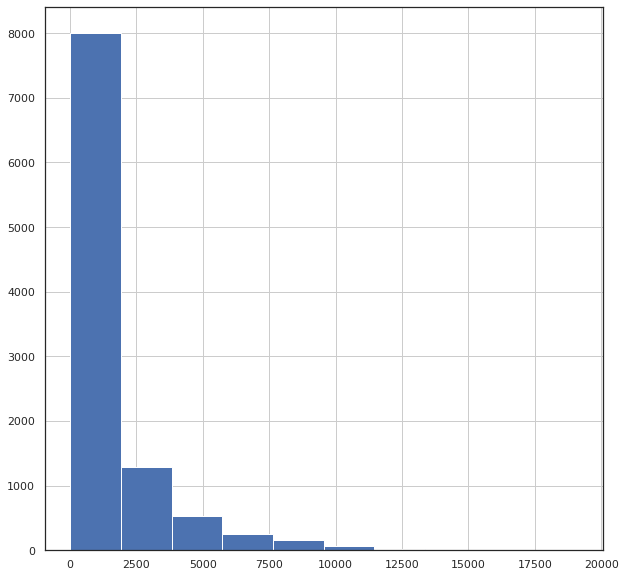

In [ ]:
df_fuzzy['odds'].hist()

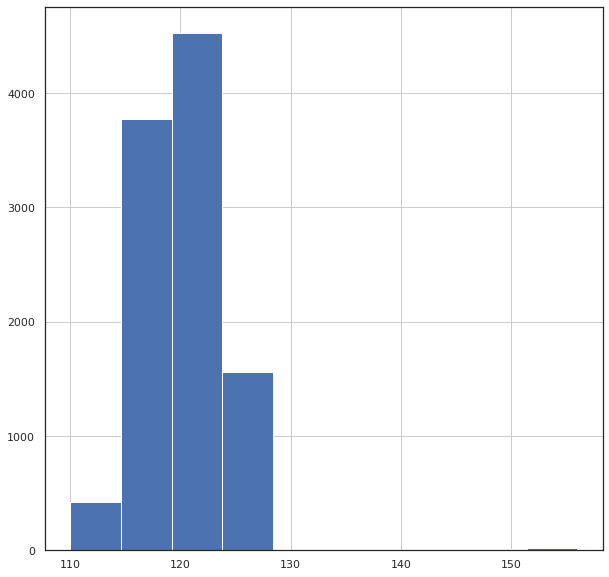

In [ ]:
df_fuzzy['weight_carried'].hist()

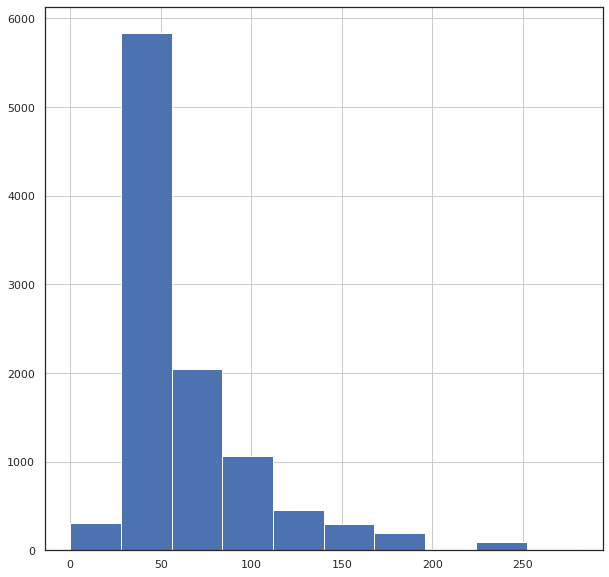

In [ ]:
df_fuzzy['run_up_distance'].hist()

In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5433aec1e7b8835d13362f74282e5e80f46970783b24c198a23c2bb67577d185
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

odds = ctrl.Antecedent(np.arange(0, 19100, 10), 'odds')
weight_carried  = ctrl.Antecedent(np.arange(110, 160, 1), 'weight_carried')
run_up_distance = ctrl.Antecedent(np.arange(0, 280, 1), 'run_up_distance')
First_3_p = ctrl.Consequent(np.arange(0, 12, 1), 'First_3')

odds.automf(3)
weight_carried.automf(3)
run_up_distance.automf(3)

First_3_p['low'] = fuzz.trimf(First_3_p.universe, [0, 0, 4])
First_3_p['medium'] = fuzz.trimf(First_3_p.universe, [0, 4, 9])
First_3_p['high'] = fuzz.trimf(First_3_p.universe, [6, 12, 12])

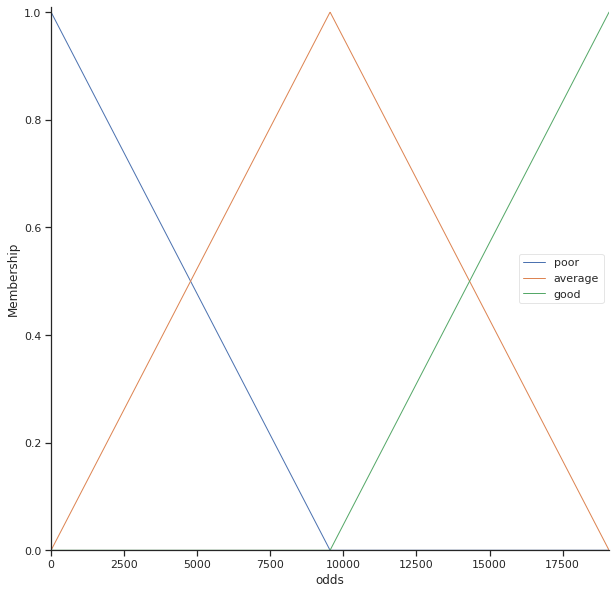

In [ ]:
odds.view();

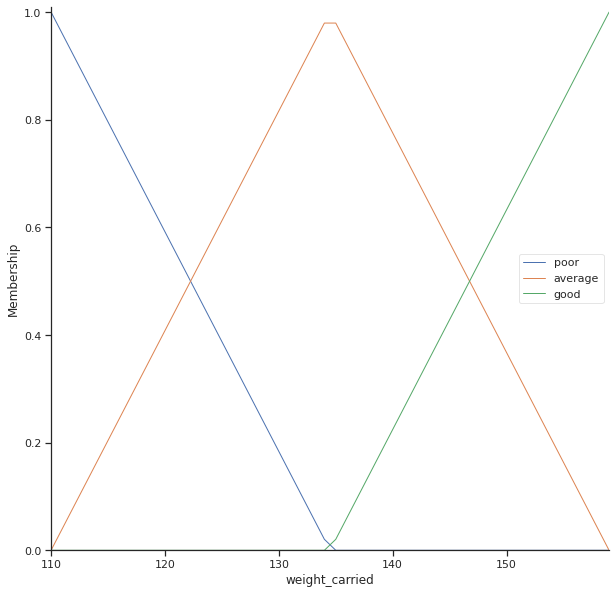

In [ ]:
weight_carried.view();

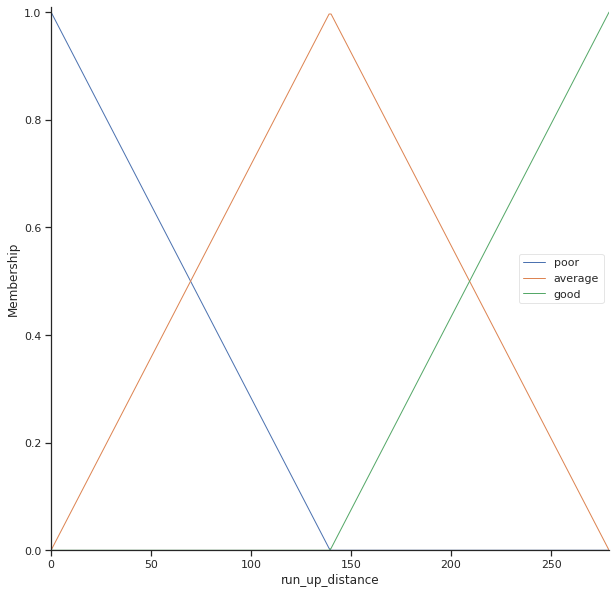

In [ ]:
run_up_distance.view();

In [ ]:
rule1 = ctrl.Rule(odds['poor'] | weight_carried['poor'] |run_up_distance['poor'], First_3_p['high'])
rule2 = ctrl.Rule(odds['good'] | weight_carried['good'] |run_up_distance['good'], First_3_p['low'])
rule3 = ctrl.Rule(odds['average'], First_3_p['medium'])

predict_first_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
predict_first = ctrl.ControlSystemSimulation(predict_first_ctrl)

8.963970573477573


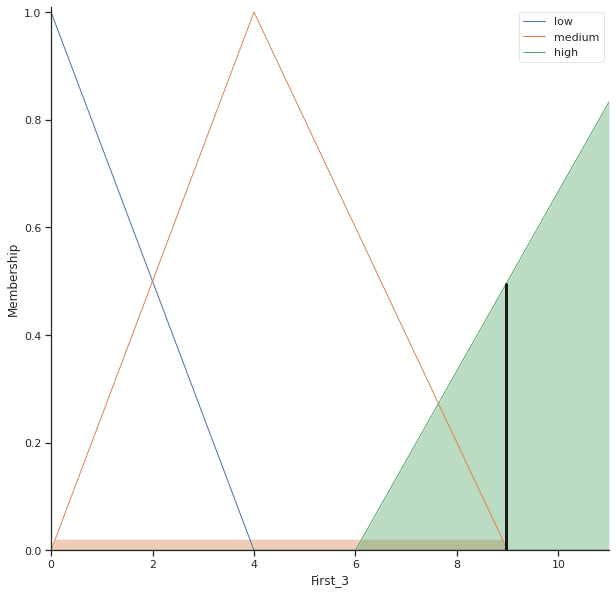

In [ ]:
predict_first.input['odds'] = df_fuzzy['odds'].iloc[[15]]
predict_first.input['weight_carried'] = df_fuzzy['weight_carried'].iloc[[15]]
predict_first.input['run_up_distance'] = df_fuzzy['run_up_distance'].iloc[[15]]

predict_first.compute()

print(predict_first.output['First_3'])
First_3_p.view(sim=predict_first)

In [ ]:
predict_first.input['odds'] = df_fuzzy['odds'].to_numpy()
predict_first.input['weight_carried'] = df_fuzzy['weight_carried'].to_numpy()
predict_first.input['run_up_distance'] = df_fuzzy['run_up_distance'].to_numpy()

predict_first.compute()

print(predict_first.output['First_3'])

[9.02480319 8.92988122 8.73503869 ... 5.88166188 5.79090545 5.7879462 ]


In [ ]:
df_fuzzy['pred'] = predict_first.output['First_3']
df_fuzzy['pred']

0        9.024803
1        8.929881
2        8.735039
3        8.116429
4        7.960767
           ...   
10324    7.197670
10325    6.154611
10326    5.881662
10327    5.790905
10328    5.787946
Name: pred, Length: 10329, dtype: float64

In [ ]:
nyra_2019_fuzzy = nyra_2019.copy()
nyra_2019_fuzzy['First_3'] = 0
nyra_2019_fuzzy.loc[nyra_2019_fuzzy['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
nyra_2019_fuzzy['pred'] = df_fuzzy['pred']
nyra_2019_fuzzy[(nyra_2019_fuzzy['race_date']=='2019-01-01') & (nyra_2019_fuzzy['race_number'] == 9)].sort_values(by='pred', 
                                                                                                                  ascending=True, na_position='first')
first_fuzz=nyra_2019_fuzzy.groupby(["race_date", "race_number"]).head(3).reset_index(
    drop=True
).sort_values(
    by=["race_date", "track_id", "race_number", "pred"],
    ascending=True,
    na_position="first",
)

first_fuzz['prediction'] = '1'
first_fuzz=first_fuzz[['race_date','race_number','program_number', 'prediction']]

nyra_2019_fuzzy=nyra_2019_fuzzy.merge(first_ods, on=['race_date','race_number','program_number'], how='left').sort_values(by=['race_date','track_id','race_number', 'pred'], ascending=True, na_position='first')
nyra_2019_fuzzy['prediction'] = nyra_2019_fuzzy['prediction'].fillna(0)
nyra_2019_fuzzy

,track_id,race_date,race_number,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,...,jockey,odds,position_at_finish,unique_id,participantes,Percentage_first_3,odds_ranking,First_3,pred,prediction
6,AQU,2019-01-01,2,7,600,D,MY,48,MCL,41000.0,...,Eric Cancel,3975,6,AQU_2019-01-01_2,7,0.428571,1.0,0,6.262719,0
5,AQU,2019-01-01,2,4,600,D,MY,48,MCL,41000.0,...,Jomar Garcia,1760,5,AQU_2019-01-01_2,7,0.428571,2.0,0,7.256863,0
4,AQU,2019-01-01,2,2,600,D,MY,48,MCL,41000.0,...,Benjamin Hernandez,940,7,AQU_2019-01-01_2,7,0.428571,3.0,0,7.960767,0
3,AQU,2019-01-01,2,5,600,D,MY,48,MCL,41000.0,...,Andre Shivnarine Worrie,800,3,AQU_2019-01-01_2,7,0.428571,4.0,1,8.116429,0
2,AQU,2019-01-01,2,6,600,D,MY,48,MCL,41000.0,...,Reylu Gutierrez,340,1,AQU_2019-01-01_2,7,0.428571,5.0,1,8.735039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,AQU,2019-12-31,8,8,600,D,SY,45,MCL,33000.0,...,Eric Cancel,1080,1,AQU_2019-12-31_8,10,0.300000,6.0,1,7.817420,0
10322,AQU,2019-12-31,8,1,600,D,SY,45,MCL,33000.0,...,Reylu Gutierrez,710,7,AQU_2019-12-31_8,10,0.300000,7.0,0,8.223685,0
10321,AQU,2019-12-31,8,6,600,D,SY,45,MCL,33000.0,...,Kendrick Carmouche,630,4,AQU_2019-12-31_8,10,0.300000,8.0,0,8.324175,1
10320,AQU,2019-12-31,8,4,600,D,SY,45,MCL,33000.0,...,Benjamin Hernandez,370,5,AQU_2019-12-31_8,10,0.300000,9.0,0,8.688785,1


Ahora vamos a integrar esta predicción naive a la base inicial.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

nyra_2019_fuzzy['First_3']=nyra_2019_fuzzy['First_3'].astype(int)
nyra_2019_fuzzy['prediction']=nyra_2019_fuzzy['prediction'].astype(int)

print('Precision:',precision_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction']))
print('Recall:',recall_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction']))
print('Accuracy:',accuracy_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction']))
print('F1_Score:',f1_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction']))

Precision: 0.6183753760703541
Recall: 0.6300400848856402
Accuracy: 0.6884499951592603
F1_Score: 0.6241532352254147


In [ ]:
d6 = {'Modelo': ['Sistema_fuzzy'], 
     'Precision': [precision_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction'])], 
     'Recall': recall_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction']),
     'Accuracy': accuracy_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction']),
      'F1_Score': f1_score(nyra_2019_fuzzy['First_3'], nyra_2019_fuzzy['prediction'])}
Resultados6 = pd.DataFrame(data=d6)
Resultados = Resultados.append(Resultados6, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153


# <h1><strong>10.Modelo: Naive Bayes.</strong></h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
df_bayes = nyra_2019.copy()
df_bayes = df_bayes.drop('jockey', axis=1)
test=df_bayes[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=df_bayes[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
df_bayes['First_3'] = 0
df_bayes.loc[df_bayes['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
# data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
df_bayes = df_bayes.drop(['unique_id', 'position_at_finish'], axis=1)
df_bayes =  pd.get_dummies(df_bayes, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_FB = df_bayes.copy()
train=train.merge(data_FB, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_FB, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']

In [ ]:
s = X_test.columns
X_train = X_train[s]

In [ ]:
X_train.columns

Index(['race_number', 'distance_id', 'run_up_distance', 'purse', 'post_time',
       'weight_carried', 'odds', 'participantes', 'Percentage_first_3',
       'odds_ranking', 'track_condition_FM ', 'track_condition_FT ',
       'track_condition_GD ', 'track_condition_MY ', 'track_condition_SF ',
       'track_condition_SY ', 'track_condition_YL ', 'course_type_D',
       'course_type_I', 'course_type_M', 'course_type_O', 'course_type_T',
       'race_type_ALW', 'race_type_AOC', 'race_type_CLM', 'race_type_MCL',
       'race_type_MSW', 'race_type_SHP', 'race_type_SOC', 'race_type_SST',
       'race_type_STK', 'race_type_STR', 'race_type_WCL', 'race_type_WMC',
       'program_number_1', 'program_number_2', 'program_number_3',
       'program_number_4', 'program_number_5', 'program_number_6',
       'program_number_7', 'program_number_8', 'program_number_9',
       'program_number_10', 'program_number_11', 'program_number_12',
       'program_number_13', 'program_number_14', 'program_number

In [ ]:
X_test.columns

Index(['race_number', 'distance_id', 'run_up_distance', 'purse', 'post_time',
       'weight_carried', 'odds', 'participantes', 'Percentage_first_3',
       'odds_ranking', 'track_condition_FM ', 'track_condition_FT ',
       'track_condition_GD ', 'track_condition_MY ', 'track_condition_SF ',
       'track_condition_SY ', 'track_condition_YL ', 'course_type_D',
       'course_type_I', 'course_type_M', 'course_type_O', 'course_type_T',
       'race_type_ALW', 'race_type_AOC', 'race_type_CLM', 'race_type_MCL',
       'race_type_MSW', 'race_type_SHP', 'race_type_SOC', 'race_type_SST',
       'race_type_STK', 'race_type_STR', 'race_type_WCL', 'race_type_WMC',
       'program_number_1', 'program_number_2', 'program_number_3',
       'program_number_4', 'program_number_5', 'program_number_6',
       'program_number_7', 'program_number_8', 'program_number_9',
       'program_number_10', 'program_number_11', 'program_number_12',
       'program_number_13', 'program_number_14', 'program_number

In [ ]:
gnb = GaussianNB()
y_pred_bayes = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print('Precision:',precision_score(y_test, y_pred_bayes))
print('Recall:',recall_score(y_test,y_pred_bayes))
print('Accuracy:',accuracy_score(y_test,y_pred_bayes))
print('F1_Score:',f1_score(y_test,y_pred_bayes))

Precision: 0.533130493576741
Recall: 0.8996006845407872
Accuracy: 0.6118175018698578
F1_Score: 0.6694969220972193


In [ ]:
d7 = {'Modelo': ['Naive_Bayes'], 
     'Precision': precision_score(y_test, y_pred_bayes), 
     'Recall': recall_score(y_test, y_pred_bayes),
     'Accuracy': accuracy_score(y_test, y_pred_bayes),
      'F1_Score': f1_score(y_test, y_pred_bayes)}
Resultados7 = pd.DataFrame(data=d7)

Resultados = Resultados.append(Resultados7, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497


# <h1><strong>11.Modelo: KNNClassifier.</strong></h1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
df_knn = nyra_2019.copy()
df_knn = df_knn.drop('jockey', axis=1)
test=df_knn[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=df_knn[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
df_knn['First_3'] = 0
df_knn.loc[df_knn['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
# data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
df_knn = df_knn.drop(['unique_id', 'position_at_finish'], axis=1)
df_knn =  pd.get_dummies(df_knn, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_FC = df_knn.copy()
train=train.merge(data_FC, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_FC, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']

s = X_test.columns
X_train = X_train[s]

In [ ]:
# Se utiliza StandarScaler en X_train, de manera que la distribución ahora se centre alrededor de 0, con una desviación estándar de 1.

ss = StandardScaler()
for c in X_train[['race_number', 'distance_id', 'run_up_distance', 'purse',
                  'post_time', 'weight_carried', 'odds', 'track_condition_FM ',
                  'track_condition_FT ', 'track_condition_GD ',
                  'track_condition_MY ', 'track_condition_SF ',
                  'track_condition_SY ', 'track_condition_YL ', 'course_type_D',
                  'course_type_I', 'course_type_M', 'course_type_O', 'course_type_T',
                  'race_type_ALW', 'race_type_AOC', 'race_type_CLM', 'race_type_MCL',
                  'race_type_MSW', 'race_type_SHP', 'race_type_SOC', 'race_type_SST',
                  'race_type_STK', 'race_type_STR', 'race_type_WCL', 'race_type_WMC',
                  'program_number_1', 'program_number_2', 'program_number_3',
                  'program_number_4', 'program_number_5', 'program_number_6',
                  'program_number_7', 'program_number_8', 'program_number_9',
                  'program_number_10', 'program_number_11', 'program_number_12',
                  'program_number_13', 'program_number_14', 'program_number_15',
                  'program_number_16', 'program_number_1  ', 'program_number_10 ',
                  'program_number_11 ', 'program_number_12 ', 'program_number_13 ',
                  'program_number_14 ', 'program_number_15 ', 'program_number_16 ',
                  'program_number_1A ', 'program_number_1X ', 'program_number_2  ',
                  'program_number_2B ', 'program_number_3  ', 'program_number_3X ',
                  'program_number_4  ', 'program_number_5  ', 'program_number_6  ',
                  'program_number_7  ', 'program_number_8  ', 'program_number_9  ',
                  'track_id_AQU', 'track_id_BEL']].columns:
    X_train[c] = ss.fit_transform(X_train[c].values.reshape(-1, 1))
X_train.head()

,race_number,distance_id,run_up_distance,purse,post_time,weight_carried,odds,participantes,Percentage_first_3,odds_ranking,...,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,track_id_AQU,track_id_BEL
0,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,1.035868,-0.671525,6,0.5,6.0,...,-0.283978,-0.009996,3.488704,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
1,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,0.461613,-0.604589,6,0.5,5.0,...,-0.283978,-0.009996,-0.286639,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
2,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,1.035868,-0.576270,6,0.5,4.0,...,-0.283978,-0.009996,-0.286639,3.594734,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
3,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,1.035868,-0.535078,6,0.5,3.0,...,-0.283978,-0.009996,-0.286639,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
4,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,-0.399770,-0.159205,6,0.5,2.0,...,3.521401,-0.009996,-0.286639,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081


In [ ]:
# Se utiliza StandarScaler en X_test, de manera que la distribución ahora se centre alrededor de 0, con una desviación estándar de 1.

ss = StandardScaler()
for c in X_test[['race_number', 'distance_id', 'run_up_distance', 'purse',
                  'post_time', 'weight_carried', 'odds', 'track_condition_FM ',
                  'track_condition_FT ', 'track_condition_GD ',
                  'track_condition_MY ', 'track_condition_SF ',
                  'track_condition_SY ', 'track_condition_YL ', 'course_type_D',
                  'course_type_I', 'course_type_M', 'course_type_O', 'course_type_T',
                  'race_type_ALW', 'race_type_AOC', 'race_type_CLM', 'race_type_MCL',
                  'race_type_MSW', 'race_type_SHP', 'race_type_SOC', 'race_type_SST',
                  'race_type_STK', 'race_type_STR', 'race_type_WCL', 'race_type_WMC',
                  'program_number_1', 'program_number_2', 'program_number_3',
                  'program_number_4', 'program_number_5', 'program_number_6',
                  'program_number_7', 'program_number_8', 'program_number_9',
                  'program_number_10', 'program_number_11', 'program_number_12',
                  'program_number_13', 'program_number_14', 'program_number_15',
                  'program_number_16', 'program_number_1  ', 'program_number_10 ',
                  'program_number_11 ', 'program_number_12 ', 'program_number_13 ',
                  'program_number_14 ', 'program_number_15 ', 'program_number_16 ',
                  'program_number_1A ', 'program_number_1X ', 'program_number_2  ',
                  'program_number_2B ', 'program_number_3  ', 'program_number_3X ',
                  'program_number_4  ', 'program_number_5  ', 'program_number_6  ',
                  'program_number_7  ', 'program_number_8  ', 'program_number_9  ',
                  'track_id_AQU', 'track_id_BEL']].columns:
    X_test[c] = ss.fit_transform(X_test[c].values.reshape(-1, 1))
X_test.head()

,race_number,distance_id,run_up_distance,purse,post_time,weight_carried,odds,participantes,Percentage_first_3,odds_ranking,...,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,track_id_AQU,track_id_BEL
0,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,0.233832,-0.641910,7,0.428571,7.0,...,3.549170,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
1,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,0.233832,-0.614049,7,0.428571,6.0,...,-0.281756,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
2,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,-1.335611,-0.553262,7,0.428571,5.0,...,-0.281756,-0.015792,-0.302372,-0.290426,3.775043,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
3,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,0.233832,-0.320246,7,0.428571,4.0,...,-0.281756,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
4,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,-1.963387,-0.249328,7,0.428571,3.0,...,-0.281756,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965


In [ ]:
# Definir el modelo KNNClassifier predeterminado, utilizando la métrica de distnacia del Coseno

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine', n_jobs=-1)
y_test_knn = classifier.fit(X_train, y_train).predict(X_test)

In [ ]:
# Revisamos los resultados de la predicción

print('Precision:',precision_score(y_test, y_test_knn))
print('Recall:',recall_score(y_test,y_test_knn))
print('Accuracy:',accuracy_score(y_test,y_test_knn))
print('F1_Score:',f1_score(y_test,y_test_knn))

Precision: 0.7249521378430122
Recall: 0.648031945236737
Accuracy: 0.7387185240588382
F1_Score: 0.6843373493975905


In [ ]:
d8 = {'Modelo': ['KNNClassifier'], 
     'Precision': precision_score(y_test, y_test_knn), 
     'Recall': recall_score(y_test, y_test_knn),
     'Accuracy': accuracy_score(y_test, y_test_knn),
      'F1_Score': f1_score(y_test, y_test_knn)}
Resultados8 = pd.DataFrame(data=d8)

Resultados = Resultados.append(Resultados8, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337


# <h1><strong>12.Modelo: XGBoost.</strong></h1>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [ ]:
df_xgb = nyra_2019.copy()
df_xgb = df_xgb.drop('jockey', axis=1)
test=df_xgb[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=df_xgb[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
df_xgb['First_3'] = 0
df_xgb.loc[df_xgb['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
# data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
df_xgb = df_xgb.drop(['unique_id', 'position_at_finish'], axis=1)
df_xgb =  pd.get_dummies(df_xgb, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_FD = df_xgb.copy()
train=train.merge(data_FD, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_FD, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']
s = X_test.columns
X_train = X_train[s]

In [ ]:
# Se utiliza StandarScaler en X_train, de manera que la distribución ahora se centre alrededor de 0, con una desviación estándar de 1.

ss = StandardScaler()
for c in X_train[['race_number', 'distance_id', 'run_up_distance', 'purse',
                  'post_time', 'weight_carried', 'odds', 'track_condition_FM ',
                  'track_condition_FT ', 'track_condition_GD ',
                  'track_condition_MY ', 'track_condition_SF ',
                  'track_condition_SY ', 'track_condition_YL ', 'course_type_D',
                  'course_type_I', 'course_type_M', 'course_type_O', 'course_type_T',
                  'race_type_ALW', 'race_type_AOC', 'race_type_CLM', 'race_type_MCL',
                  'race_type_MSW', 'race_type_SHP', 'race_type_SOC', 'race_type_SST',
                  'race_type_STK', 'race_type_STR', 'race_type_WCL', 'race_type_WMC',
                  'program_number_1', 'program_number_2', 'program_number_3',
                  'program_number_4', 'program_number_5', 'program_number_6',
                  'program_number_7', 'program_number_8', 'program_number_9',
                  'program_number_10', 'program_number_11', 'program_number_12',
                  'program_number_13', 'program_number_14', 'program_number_15',
                  'program_number_16', 'program_number_1  ', 'program_number_10 ',
                  'program_number_11 ', 'program_number_12 ', 'program_number_13 ',
                  'program_number_14 ', 'program_number_15 ', 'program_number_16 ',
                  'program_number_1A ', 'program_number_1X ', 'program_number_2  ',
                  'program_number_2B ', 'program_number_3  ', 'program_number_3X ',
                  'program_number_4  ', 'program_number_5  ', 'program_number_6  ',
                  'program_number_7  ', 'program_number_8  ', 'program_number_9  ',
                  'track_id_AQU', 'track_id_BEL']].columns:
    X_train[c] = ss.fit_transform(X_train[c].values.reshape(-1, 1))
X_train.head()

,race_number,distance_id,run_up_distance,purse,post_time,weight_carried,odds,participantes,Percentage_first_3,odds_ranking,...,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,track_id_AQU,track_id_BEL
0,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,1.035868,-0.671525,6,0.5,6.0,...,-0.283978,-0.009996,3.488704,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
1,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,0.461613,-0.604589,6,0.5,5.0,...,-0.283978,-0.009996,-0.286639,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
2,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,1.035868,-0.576270,6,0.5,4.0,...,-0.283978,-0.009996,-0.286639,3.594734,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
3,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,1.035868,-0.535078,6,0.5,3.0,...,-0.283978,-0.009996,-0.286639,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081
4,-1.561713,-0.819782,-0.504641,-0.26528,3.04534,-0.399770,-0.159205,6,0.5,2.0,...,3.521401,-0.009996,-0.286639,-0.278185,-0.268475,-0.244811,-0.213912,-0.180843,1.249827,-0.795081


In [ ]:
# Se utiliza StandarScaler en X_test, de manera que la distribución ahora se centre alrededor de 0, con una desviación estándar de 1.

ss = StandardScaler()
for c in X_test[['race_number', 'distance_id', 'run_up_distance', 'purse',
                  'post_time', 'weight_carried', 'odds', 'track_condition_FM ',
                  'track_condition_FT ', 'track_condition_GD ',
                  'track_condition_MY ', 'track_condition_SF ',
                  'track_condition_SY ', 'track_condition_YL ', 'course_type_D',
                  'course_type_I', 'course_type_M', 'course_type_O', 'course_type_T',
                  'race_type_ALW', 'race_type_AOC', 'race_type_CLM', 'race_type_MCL',
                  'race_type_MSW', 'race_type_SHP', 'race_type_SOC', 'race_type_SST',
                  'race_type_STK', 'race_type_STR', 'race_type_WCL', 'race_type_WMC',
                  'program_number_1', 'program_number_2', 'program_number_3',
                  'program_number_4', 'program_number_5', 'program_number_6',
                  'program_number_7', 'program_number_8', 'program_number_9',
                  'program_number_10', 'program_number_11', 'program_number_12',
                  'program_number_13', 'program_number_14', 'program_number_15',
                  'program_number_16', 'program_number_1  ', 'program_number_10 ',
                  'program_number_11 ', 'program_number_12 ', 'program_number_13 ',
                  'program_number_14 ', 'program_number_15 ', 'program_number_16 ',
                  'program_number_1A ', 'program_number_1X ', 'program_number_2  ',
                  'program_number_2B ', 'program_number_3  ', 'program_number_3X ',
                  'program_number_4  ', 'program_number_5  ', 'program_number_6  ',
                  'program_number_7  ', 'program_number_8  ', 'program_number_9  ',
                  'track_id_AQU', 'track_id_BEL']].columns:
    X_test[c] = ss.fit_transform(X_test[c].values.reshape(-1, 1))
X_test.head()

,race_number,distance_id,run_up_distance,purse,post_time,weight_carried,odds,participantes,Percentage_first_3,odds_ranking,...,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,track_id_AQU,track_id_BEL
0,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,0.233832,-0.641910,7,0.428571,7.0,...,3.549170,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
1,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,0.233832,-0.614049,7,0.428571,6.0,...,-0.281756,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
2,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,-1.335611,-0.553262,7,0.428571,5.0,...,-0.281756,-0.015792,-0.302372,-0.290426,3.775043,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
3,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,0.233832,-0.320246,7,0.428571,4.0,...,-0.281756,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965
4,-1.212773,-0.882747,-0.438152,-0.346572,3.488506,-1.963387,-0.249328,7,0.428571,3.0,...,-0.281756,-0.015792,-0.302372,-0.290426,-0.264898,-0.231485,-0.195735,-0.166346,0.829965,-0.829965


In [ ]:
from xgboost import XGBClassifier

# Definir el modelo con hiperparámetros predeterminados
model = XGBClassifier()
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)

In [ ]:
# Revisamos los resultados de la predicción
print('Precision:',precision_score(y_test, y_test_hat))
print('Recall:',recall_score(y_test,y_test_hat))
print('Accuracy:',accuracy_score(y_test,y_test_hat))
print('F1_Score:',f1_score(y_test,y_test_hat))

Precision: 0.7005649717514124
Recall: 0.5658870507701084
Accuracy: 0.7045624532535527
F1_Score: 0.6260650047333544


In [ ]:
d9 = {'Modelo': ['XGBoost'], 
     'Precision': precision_score(y_test, y_test_hat), 
     'Recall': recall_score(y_test, y_test_hat),
     'Accuracy': accuracy_score(y_test, y_test_hat),
      'F1_Score': f1_score(y_test, y_test_hat)}
Resultados9 = pd.DataFrame(data=d9)

Resultados = Resultados.append(Resultados9, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337
9,XGBoost,0.700565,0.565887,0.704562,0.626065


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# XGBoost
# Definir la grilla de valores a buscar
# n_jobs=-1 para permitir ejecutarlo en todos los núcleos
params = {
    'learning_rate': [0.01,0.05],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5,],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [0.5, 1],
    'base_score': [0.2, 0.5]
}

# Definir el procedimiento de búsqueda de la grilla
gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='accuracy')

# Ejecutar la búsqueda de grilla
y_pred_xgb = gs2.fit(X_train, y_train).predict(X_test)


# Resumir la mejor puntuación y parámetros
print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.7070935400316247
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [ ]:
# Revisamos los resultados de la predicción

print('Precision:',precision_score(y_test, y_pred_xgb))
print('Recall:',recall_score(y_test,y_pred_xgb))
print('Accuracy:',accuracy_score(y_test,y_pred_xgb))
print('F1_Score:',f1_score(y_test,y_pred_xgb))

Precision: 0.7045123726346434
Recall: 0.5521962350256703
Accuracy: 0.7030665669409125
F1_Score: 0.6191237607930924


In [ ]:
d10 = {'Modelo': ['XGBoost_tuning'], 
     'Precision': precision_score(y_test, y_pred_xgb), 
     'Recall': recall_score(y_test, y_pred_xgb),
     'Accuracy': accuracy_score(y_test, y_pred_xgb),
      'F1_Score': f1_score(y_test, y_pred_xgb)}
Resultados10 = pd.DataFrame(data=d10)

Resultados = Resultados.append(Resultados10, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337
9,XGBoost,0.700565,0.565887,0.704562,0.626065


# <h1><strong>13.Modelo: CatBoost.</strong></h1>

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer
from catboost import Pool, cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 51.8 MB/s 


In [ ]:
df_cat = nyra_2019.copy()
df_cat = df_cat.drop('jockey', axis=1)
test=df_cat[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=df_cat[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
df_cat['First_3'] = 0
df_cat.loc[df_cat['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
# data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
df_cat = df_cat.drop(['unique_id', 'position_at_finish'], axis=1)
df_cat =  pd.get_dummies(df_cat, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_FE = df_cat.copy()
train=train.merge(data_FE, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_FE, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
train = train.drop('odds', axis=1)
test = test.drop('odds', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']
s = X_test.columns
X_train = X_train[s]

In [ ]:
# Definir el modelo con hiperparámetros predeterminados

modelcat = CatBoostClassifier()
modelcat.fit(X_train, y_train)
y_test_pred = modelcat.predict(X_test)

Learning rate set to 0.02755
0:	learn: 0.6871970	total: 12.2ms	remaining: 12.2s
1:	learn: 0.6815814	total: 17.9ms	remaining: 8.92s
2:	learn: 0.6769910	total: 23.3ms	remaining: 7.76s
3:	learn: 0.6721220	total: 29ms	remaining: 7.23s
4:	learn: 0.6670461	total: 34.2ms	remaining: 6.81s
5:	learn: 0.6624372	total: 39.3ms	remaining: 6.51s
6:	learn: 0.6584671	total: 44.4ms	remaining: 6.3s
7:	learn: 0.6542886	total: 51.6ms	remaining: 6.4s
8:	learn: 0.6508666	total: 56.7ms	remaining: 6.24s
9:	learn: 0.6471850	total: 61.8ms	remaining: 6.11s
10:	learn: 0.6437989	total: 66.9ms	remaining: 6.02s
11:	learn: 0.6404214	total: 72ms	remaining: 5.93s
12:	learn: 0.6376291	total: 77.3ms	remaining: 5.87s
13:	learn: 0.6344821	total: 82.8ms	remaining: 5.83s
14:	learn: 0.6322111	total: 88ms	remaining: 5.78s
15:	learn: 0.6298442	total: 93.1ms	remaining: 5.72s
16:	learn: 0.6272775	total: 98.4ms	remaining: 5.69s
17:	learn: 0.6248416	total: 104ms	remaining: 5.67s
18:	learn: 0.6228872	total: 109ms	remaining: 5.63s
19:

In [ ]:
# Revisamos los resultados de la predicción

print('Precision:',precision_score(y_test,y_test_pred))
print('Recall:',recall_score(y_test,y_test_pred))
print('Accuracy:',accuracy_score(y_test,y_test_pred))
print('F1_Score:',f1_score(y_test,y_test_pred))

Precision: 0.7469733656174334
Recall: 0.703936109526526
Accuracy: 0.7663924208426827
F1_Score: 0.7248164464023494


In [ ]:
d11 = {'Modelo': ['CatBoost'], 
     'Precision': precision_score(y_test, y_test_pred), 
     'Recall': recall_score(y_test, y_test_pred),
     'Accuracy': accuracy_score(y_test, y_test_pred),
      'F1_Score': f1_score(y_test, y_test_pred)}
Resultados11 = pd.DataFrame(data=d11)

Resultados = Resultados.append(Resultados11, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.594276,0.805476,0.674645,0.683943
3,CatBoost,0.764073,0.689104,0.771129,0.724655


In [ ]:
# Definir la grilla de valores a buscar
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'loss_function': ['Logloss', 'CrossEntropy'],
        'eval_metric': ['Accuracy'],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

# Definir la métrica de puntuación
scorer = make_scorer(accuracy_score)

# Definir el procedimiento de búsqueda de la grilla
grid_result = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, cv=5, n_jobs=-1)

# Ejecutar la búsqueda de grilla
y_pred_cat = grid_result.fit(X_train, y_train).predict(X_test)

# Resumir la mejor puntuación y parámetros
print('Best score:', grid_result.best_score_)
print('Best score:', grid_result.best_params_)

NameError: ignored

In [ ]:
# Revisamos los resultados de la predicción

print('Precision:',precision_score(y_test, y_pred_cat))
print('Recall:',recall_score(y_test,y_pred_cat))
print('Accuracy:',accuracy_score(y_test,y_pred_cat))
print('F1_Score:',f1_score(y_test,y_pred_cat))

In [ ]:
d12 = {'Modelo': ['CatBoost_tuning'], 
     'Precision': precision_score(y_test, y_pred_cat), 
     'Recall': recall_score(y_test, y_pred_cat),
     'Accuracy': accuracy_score(y_test, y_pred_cat),
      'F1_Score': f1_score(y_test, y_pred_cat)}
Resultados12 = pd.DataFrame(data=d12)

Resultados = Resultados.append(Resultados12, ignore_index=True)
Resultados

# <h1><strong>14.Modelo: AdaBoost.</strong></h1>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df_cat = nyra_2019.copy()
df_cat = df_cat.drop('jockey', axis=1)
test=df_cat[["race_date", "track_id", "race_number"]].drop_duplicates().head(600)
train=df_cat[["race_date", "track_id", "race_number"]].drop_duplicates().tail(1400)
df_cat['First_3'] = 0
df_cat.loc[df_cat['position_at_finish'].between(0, 4, inclusive=False), 'First_3'] = 1
# data.loc[data['position_at_finish'].between(4, 60, inclusive=True), 'First_3'] = 0
#Traigo 70% de las carreras para train y el 30% para test
df_cat = df_cat.drop(['unique_id', 'position_at_finish'], axis=1)
df_cat =  pd.get_dummies(df_cat, columns=['track_condition', 'course_type', 'race_type', 'program_number'], dtype='float')
data_FF = df_cat.copy()
train=train.merge(data_FF, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
test=test.merge(data_FF, on=['race_date','race_number','track_id'], how='left').sort_values(by=['race_date','track_id','race_number', 'odds'], ascending=True, na_position='first')
train = pd.get_dummies(train, columns=['track_id'], dtype='float')
test = pd.get_dummies(test, columns=['track_id'], dtype='float')
train = train.drop('race_date', axis=1)
test = test.drop('race_date', axis=1)
X_train, y_train = train.drop('First_3', axis=1), train['First_3']
X_test, y_test = test.drop('First_3', axis=1), test['First_3']
s = X_test.columns
X_train = X_train[s]

In [ ]:
# Definir el modelo con hiperparámetros predeterminados
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))

ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

In [ ]:
# Revisamos los resultados de la predicción

print('Precision:',precision_score(y_test, y_pred_ada))
print('Recall:',recall_score(y_test,y_pred_ada))
print('Accuracy:',accuracy_score(y_test,y_pred_ada))
print('F1_Score:',f1_score(y_test,y_pred_ada))

Precision: 0.6779975278121138
Recall: 0.6257843696520251
Accuracy: 0.706556968337073
F1_Score: 0.6508454464550578


In [ ]:
d13 = {'Modelo': ['AdaBoost'], 
     'Precision': precision_score(y_test, y_pred_ada), 
     'Recall': recall_score(y_test, y_pred_ada),
     'Accuracy': accuracy_score(y_test, y_pred_ada),
      'F1_Score': f1_score(y_test, y_pred_ada)}
Resultados13 = pd.DataFrame(data=d13)

Resultados = Resultados.append(Resultados13, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337
9,XGBoost,0.700565,0.565887,0.704562,0.626065


In [ ]:
# Definir la grilla de valores a buscar
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators" :[10, 100, 200],
              "learning_rate":  [0.05, 0.5, 1.5]}

# Definir el procedimiento de evaluación
cv = RepeatedStratifiedKFold(n_splits=3, random_state=1)

# Definir el procedimiento de búsqueda de la grilla
grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)

# Ejecutar la búsqueda de grilla
y_pred_ada = grid_ada_clf.fit(X_train, y_train).predict(X_test)

# Resumir la mejor puntuación y parámetros
print('Best score:', grid_ada_clf.best_score_)
print('Best score:', grid_ada_clf.best_params_)

Fitting 30 folds for each of 36 candidates, totalling 1080 fits
Best score: 0.7035463867443653
Best score: {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'learning_rate': 0.05, 'n_estimators': 100}


In [ ]:
# Revisamos los resultados de la predicción

print('Precision:',precision_score(y_test, y_pred_ada))
print('Recall:',recall_score(y_test,y_pred_ada))
print('Accuracy:',accuracy_score(y_test,y_pred_ada))
print('F1_Score:',f1_score(y_test,y_pred_ada))

Precision: 0.6863130320890635
Recall: 0.5978322875071307
Accuracy: 0.7048117676389928
F1_Score: 0.6390243902439025


In [ ]:
d14 = {'Modelo': ['AdaBoost_tuning'], 
     'Precision': precision_score(y_test, y_pred_ada), 
     'Recall': recall_score(y_test, y_pred_ada),
     'Accuracy': accuracy_score(y_test, y_pred_ada),
      'F1_Score': f1_score(y_test, y_pred_ada)}
Resultados14 = pd.DataFrame(data=d14)

Resultados = Resultados.append(Resultados14, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337
9,XGBoost,0.700565,0.565887,0.704562,0.626065


# <h1><strong>15.Modelo: Voting.</strong></h1>

In [ ]:
nyra_2019_naive = nyra_2019.copy()
nyra_2019_naive["First_3"] = "Unknown"
nyra_2019_naive.loc[
    nyra_2019_naive["position_at_finish"].between(0, 4, inclusive=False), "First_3"
] = 1
nyra_2019_naive.loc[
    nyra_2019_naive["position_at_finish"].between(4, 60, inclusive=True), "First_3"
] = 0

nyra_2019_naive_cat=nyra_2019_naive[["race_date","track_id","race_number",'weight_carried','Percentage_first_3']]
nyra_2019_naive_cat=pd.get_dummies(nyra_2019_naive,columns=['track_condition','course_type','race_type','odds_ranking'],dtype='float')


test=nyra_2019_naive_cat[["race_date","track_id","race_number"]].sort_values(by=['race_date','track_id','race_number']).drop_duplicates().head(600)
train=nyra_2019_naive_cat[["race_date","track_id","race_number"]].sort_values(by=['race_date','track_id','race_number']).drop_duplicates().tail(1400)
train_total=train.merge(nyra_2019_naive_cat,on=['race_date','race_number','track_id'],how='left').sort_values(by=['race_date','track_id','race_number'],ascending=True,na_position='first').reset_index()
test_total=test.merge(nyra_2019_naive_cat,on=['race_date','race_number','track_id'],how='left').sort_values(by=['race_date','track_id','race_number'],ascending=True,na_position='first').reset_index()

df_ann_1=nyra_2019_naive_cat.copy()
df_ann_1=df_ann_1.drop('jockey',axis=1)
train=train_total.drop('race_date',axis=1)
test=test_total.drop('race_date',axis=1)
train=train_total.drop('race_date',axis=1)
# s = X_test.columns
# X_train = X_train[s]
# TargetVariable=['First_3']
# Predictors=['weight_carried', 'Percentage_first_3', 'track_condition_FM ',
#        'track_condition_FT ', 'track_condition_GD ', 'track_condition_MY ',
#        'track_condition_SF ', 'track_condition_SY ', 'track_condition_YL ',
#        'course_type_D', 'course_type_I', 'course_type_M', 'course_type_O',
#        'course_type_T', 'race_type_ALW', 'race_type_AOC', 'race_type_CLM',
#        'race_type_MCL', 'race_type_MSW', 'race_type_SHP', 'race_type_SOC',
#        'race_type_SST', 'race_type_STK', 'race_type_STR', 'race_type_WCL',
#        'race_type_WMC', 'odds_ranking_1.0', 'odds_ranking_2.0',
#        'odds_ranking_3.0', 'odds_ranking_4.0', 'odds_ranking_5.0',
#        'odds_ranking_6.0', 'odds_ranking_7.0', 'odds_ranking_8.0',
#        'odds_ranking_9.0', 'odds_ranking_10.0', 'odds_ranking_11.0',
#        'odds_ranking_12.0']

Se divide la base en train y test

In [ ]:
X_train=train[['weight_carried','Percentage_first_3', 'track_condition_FM ',
       'track_condition_FT ', 'track_condition_GD ', 'track_condition_MY ',
       'track_condition_SF ', 'track_condition_SY ', 'track_condition_YL ',
       'course_type_D', 'course_type_I', 'course_type_M', 'course_type_O',
       'course_type_T', 'race_type_ALW', 'race_type_AOC', 'race_type_CLM',
       'race_type_MCL', 'race_type_MSW', 'race_type_SHP', 'race_type_SOC',
       'race_type_SST', 'race_type_STK', 'race_type_STR', 'race_type_WCL',
       'race_type_WMC', 'odds_ranking_1.0', 'odds_ranking_2.0',
       'odds_ranking_3.0', 'odds_ranking_4.0', 'odds_ranking_5.0',
       'odds_ranking_6.0', 'odds_ranking_7.0', 'odds_ranking_8.0',
       'odds_ranking_9.0', 'odds_ranking_10.0', 'odds_ranking_11.0',
       'odds_ranking_12.0']]
y_train=train[['First_3']]
X_test=test[['weight_carried', 'Percentage_first_3', 'track_condition_FM ',
       'track_condition_FT ', 'track_condition_GD ', 'track_condition_MY ',
       'track_condition_SF ', 'track_condition_SY ', 'track_condition_YL ',
       'course_type_D', 'course_type_I', 'course_type_M', 'course_type_O',
       'course_type_T', 'race_type_ALW', 'race_type_AOC', 'race_type_CLM',
       'race_type_MCL', 'race_type_MSW', 'race_type_SHP', 'race_type_SOC',
       'race_type_SST', 'race_type_STK', 'race_type_STR', 'race_type_WCL',
       'race_type_WMC', 'odds_ranking_1.0', 'odds_ranking_2.0',
       'odds_ranking_3.0', 'odds_ranking_4.0', 'odds_ranking_5.0',
       'odds_ranking_6.0', 'odds_ranking_7.0', 'odds_ranking_8.0',
       'odds_ranking_9.0', 'odds_ranking_10.0', 'odds_ranking_11.0',
       'odds_ranking_12.0']]
y_test=test[['First_3']]
y_train['First_3'] = y_train['First_3'] .astype(int)
y_test['First_3'] = y_test['First_3'] .astype(int)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10010, 38)
(10010, 1)
(4011, 38)
(4011, 1)


In [ ]:
y_train['First_3'] = y_train['First_3'] .astype(int)

In [ ]:
y_train['First_3'].unique()

array([1, 0])

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
svc = SVC()

model=CatBoostClassifier()
cb_params = {'depth' : [6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.2],
             'iterations' : [100, 150, 200]
            }
grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', n_jobs=-1)
grid_cb.fit(X_train, y_train)

0:	learn: 0.6834531	total: 4.64ms	remaining: 692ms
1:	learn: 0.6737884	total: 8.4ms	remaining: 621ms
2:	learn: 0.6648505	total: 15.1ms	remaining: 742ms
3:	learn: 0.6578964	total: 21.1ms	remaining: 771ms
4:	learn: 0.6510683	total: 24.9ms	remaining: 722ms
5:	learn: 0.6453524	total: 28.7ms	remaining: 690ms
6:	learn: 0.6400346	total: 32.2ms	remaining: 658ms
7:	learn: 0.6353221	total: 36.8ms	remaining: 653ms
8:	learn: 0.6313324	total: 40.6ms	remaining: 636ms
9:	learn: 0.6270849	total: 44.6ms	remaining: 625ms
10:	learn: 0.6244284	total: 48.7ms	remaining: 615ms
11:	learn: 0.6213429	total: 52.7ms	remaining: 606ms
12:	learn: 0.6184839	total: 56.8ms	remaining: 599ms
13:	learn: 0.6161744	total: 60.9ms	remaining: 591ms
14:	learn: 0.6143619	total: 64.9ms	remaining: 584ms
15:	learn: 0.6119099	total: 68.6ms	remaining: 574ms
16:	learn: 0.6103566	total: 72.6ms	remaining: 568ms
17:	learn: 0.6086786	total: 76.5ms	remaining: 561ms
18:	learn: 0.6071262	total: 80.5ms	remaining: 555ms
19:	learn: 0.6054606	to

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f0f7b753450>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 150, 200],
                         'learning_rate': [0.05, 0.1, 0.2]},
             scoring='accuracy')

In [ ]:
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GaussianNB()
clf4 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf5 = grid_cb.best_estimator_
clf4 = SVC(probability=True, random_state=42)

eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('GNB', clf3), ('MLP', clf4), ('CB', clf5)],
                        voting='hard', weights=[1,1,1,1,1])

eclf.fit(X_train, y_train)

0:	learn: 0.6834531	total: 5ms	remaining: 746ms
1:	learn: 0.6737884	total: 10.4ms	remaining: 770ms
2:	learn: 0.6648505	total: 14.3ms	remaining: 701ms
3:	learn: 0.6578964	total: 18.4ms	remaining: 673ms
4:	learn: 0.6510683	total: 22.4ms	remaining: 650ms
5:	learn: 0.6453524	total: 26.3ms	remaining: 632ms
6:	learn: 0.6400346	total: 29.9ms	remaining: 610ms
7:	learn: 0.6353221	total: 34ms	remaining: 604ms
8:	learn: 0.6313324	total: 37.9ms	remaining: 594ms
9:	learn: 0.6270849	total: 41.6ms	remaining: 582ms
10:	learn: 0.6244284	total: 45.5ms	remaining: 575ms
11:	learn: 0.6213429	total: 49.8ms	remaining: 573ms
12:	learn: 0.6184839	total: 54.1ms	remaining: 570ms
13:	learn: 0.6161744	total: 58.5ms	remaining: 568ms
14:	learn: 0.6143619	total: 62.6ms	remaining: 563ms
15:	learn: 0.6119099	total: 66.3ms	remaining: 555ms
16:	learn: 0.6103566	total: 70.8ms	remaining: 554ms
17:	learn: 0.6086786	total: 74.8ms	remaining: 548ms
18:	learn: 0.6071262	total: 79.1ms	remaining: 545ms
19:	learn: 0.6054606	total:

VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('RF', RandomForestClassifier(random_state=42)),
                             ('GNB', GaussianNB()),
                             ('MLP', SVC(probability=True, random_state=42)),
                             ('CB',
                              <catboost.core.CatBoostClassifier object at 0x7f0f76ce1250>)],
                 weights=[1, 1, 1, 1, 1])

In [ ]:
y_pred_voting = eclf.fit(X_train, y_train).predict(X_test)
print('Precision:',precision_score(y_test .astype(int), (y_pred_voting.astype(int))))
print('recall_score:',recall_score(y_test.astype(int), (y_pred_voting.astype(int))))
print('Accuracy:',accuracy_score(y_test.astype(int), (y_pred_voting.astype(int))))
print('F1_Score:',f1_score(y_test.astype(int), (y_pred_voting.astype(int))))

0:	learn: 0.6834531	total: 4.19ms	remaining: 625ms
1:	learn: 0.6737884	total: 8ms	remaining: 592ms
2:	learn: 0.6648505	total: 12.5ms	remaining: 610ms
3:	learn: 0.6578964	total: 17.3ms	remaining: 630ms
4:	learn: 0.6510683	total: 21.4ms	remaining: 619ms
5:	learn: 0.6453524	total: 25.6ms	remaining: 614ms
6:	learn: 0.6400346	total: 29.7ms	remaining: 608ms
7:	learn: 0.6353221	total: 34ms	remaining: 603ms
8:	learn: 0.6313324	total: 38.3ms	remaining: 599ms
9:	learn: 0.6270849	total: 42ms	remaining: 588ms
10:	learn: 0.6244284	total: 46.1ms	remaining: 583ms
11:	learn: 0.6213429	total: 50.5ms	remaining: 581ms
12:	learn: 0.6184839	total: 54.6ms	remaining: 575ms
13:	learn: 0.6161744	total: 58.9ms	remaining: 572ms
14:	learn: 0.6143619	total: 62.9ms	remaining: 566ms
15:	learn: 0.6119099	total: 66.5ms	remaining: 557ms
16:	learn: 0.6103566	total: 70.6ms	remaining: 553ms
17:	learn: 0.6086786	total: 74.5ms	remaining: 547ms
18:	learn: 0.6071262	total: 78.4ms	remaining: 541ms
19:	learn: 0.6054606	total: 8

In [ ]:
d15 = {'Modelo': ['Voting'], 
     'Precision': precision_score(y_test, y_pred_voting), 
     'Recall': recall_score(y_test, y_pred_voting),
     'Accuracy': accuracy_score(y_test, y_pred_voting),
      'F1_Score': f1_score(y_test, y_pred_voting)}
Resultados15 = pd.DataFrame(data=d15)

Resultados = Resultados.append(Resultados15, ignore_index=True)
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337
9,XGBoost,0.700565,0.565887,0.704562,0.626065


# <h1><strong>16.Conclusiones.</strong></h1>

In [ ]:
Resultados

,Modelo,Precision,Recall,Accuracy,F1_Score
0,Sistema_experto,0.618375,0.630040,0.688450,0.624153
1,Red_Neuronal_1,0.593855,0.804906,0.674146,0.683458
2,Red_Neuronal_2,0.593013,0.803765,0.673149,0.682490
3,Algoritmo_Genético_Feature_Selection,0.611913,0.558791,0.670759,0.584147
4,Algoritmo_Genético_Hyperparameter_Tuning,0.617971,0.585714,0.678718,0.601410
5,Red_Neuronal_Algoritmo_Genético,0.937500,0.008557,0.566442,0.016959
6,Sistema_fuzzy,0.618375,0.630040,0.688450,0.624153
7,Naive_Bayes,0.533130,0.899601,0.611818,0.669497
8,KNNClassifier,0.724952,0.648032,0.738719,0.684337
9,XGBoost,0.700565,0.565887,0.704562,0.626065


### Mejores modelos

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import shap

In [ ]:
features_tra

Index(['weight_carried', 'odds_ranking', 'Percentage_first_3'], dtype='object')

In [ ]:
features_te

Index(['weight_carried', 'odds_ranking', 'Percentage_first_3'], dtype='object')

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
# Fits the explainer
explainer1 = shap.KernelExplainer(classifier.predict, X_train)
# Calculates the SHAP values - It takes some time
shap_values1 = explainer1.shap_values(shap.sample(X_test, 500))
# explainer = shap.DeepExplainer(model, x_train)
# shap_values = explainer.shap_values(x_test)

313/313 [==============================] - 1s 3ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

1877/1877 [==============================] - 3s 2ms/step


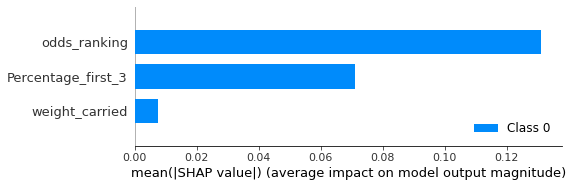

In [ ]:
shap.summary_plot(shap_values1, X_test, feature_names=features_tra)
# # or 
# shap.plots.beeswarm(shap_values1)

In [ ]:
# Fits the explainer
masker = shap.maskers.Independent(data = X_train)
masker = shap.maskers.Independent(data = X_test)

explainer2 = shap.KernelExplainer(classifier2.predict, X_train, masker = masker)

# Calculates the SHAP values - It takes some time
shap_values2 = explainer2(shap.sample(X_test, 500))

313/313 [==============================] - 1s 4ms/step


AttributeError: ignored

In [ ]:
shap.summary_plot(shap_values2)
# or 
shap.plots.beeswarm(shap_values2)

In [ ]:
# Fits the explainer
explainer3 = shap.Explainer(modelcat.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values3 = explainer3(X_test)

Permutation explainer: 4012it [06:49,  9.53it/s]


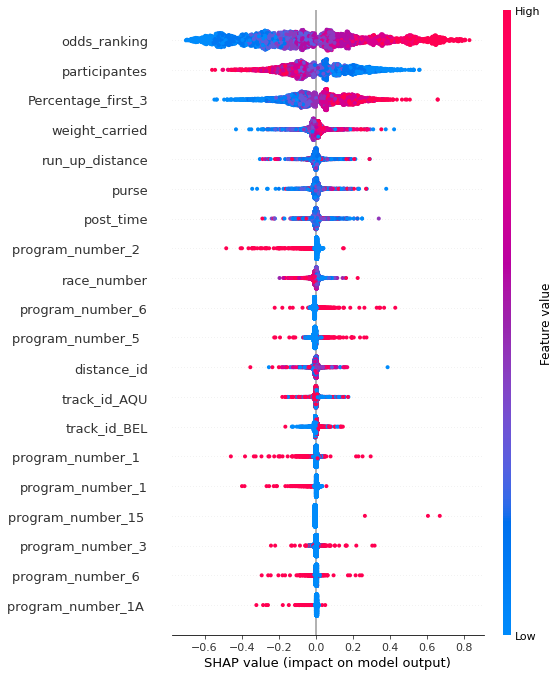

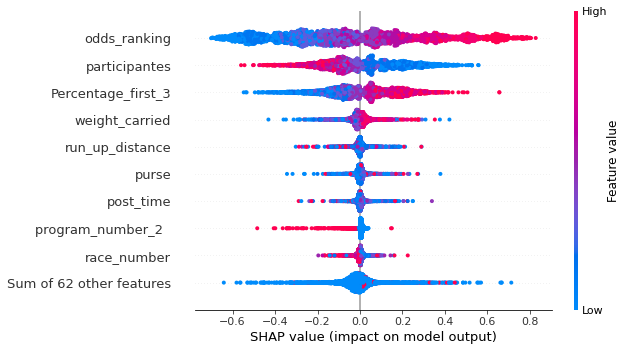

In [ ]:
shap.summary_plot(shap_values3)
# or 
shap.plots.beeswarm(shap_values3)